In [2]:


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")


TensorFlow version: 2.19.0
Keras version: 3.10.0


In [3]:
# Configuration pour des visualisations de qualité
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [4]:


print("\n" + "="*70)
print("ÉTAPE 1: CRÉATION DE L'INPUT VOLUME")
print("="*70)

# Créer un input volume de dimensions 5x5x3 (comme dans l'image)
# Dimensions: (hauteur, largeur, canaux)
np.random.seed(42)

# Input simple avec des valeurs aléatoires pour mieux visualiser
input_volume = np.array([
    # Canal 1 (Red)
    [[0, 0, 0, 0, 0],
     [0, 0, 1, 1, 0],
     [0, 1, 2, 1, 0],
     [0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0]],

    # Canal 2 (Green)
    [[0, 0, 0, 0, 0],
     [0, 1, 2, 0, 0],
     [1, 2, 1, 0, 0],
     [1, 2, 1, 0, 0],
     [0, 1, 0, 0, 0]],

    # Canal 3 (Blue)
    [[0, 0, 2, 0, 0],
     [0, 0, 1, 0, 0],
     [1, 1, 0, 0, 0],
     [1, 1, 1, 0, 0],
     [0, 1, 0, 0, 0]]
])

# Réorganiser en format (hauteur, largeur, canaux) pour TensorFlow
input_volume = np.transpose(input_volume, (1, 2, 0))

print(f"Dimensions de l'input: {input_volume.shape}")
print(f"  - Hauteur: {input_volume.shape[0]}")
print(f"  - Largeur: {input_volume.shape[1]}")
print(f"  - Canaux (Depth): {input_volume.shape[2]}")



ÉTAPE 1: CRÉATION DE L'INPUT VOLUME
Dimensions de l'input: (5, 5, 3)
  - Hauteur: 5
  - Largeur: 5
  - Canaux (Depth): 3


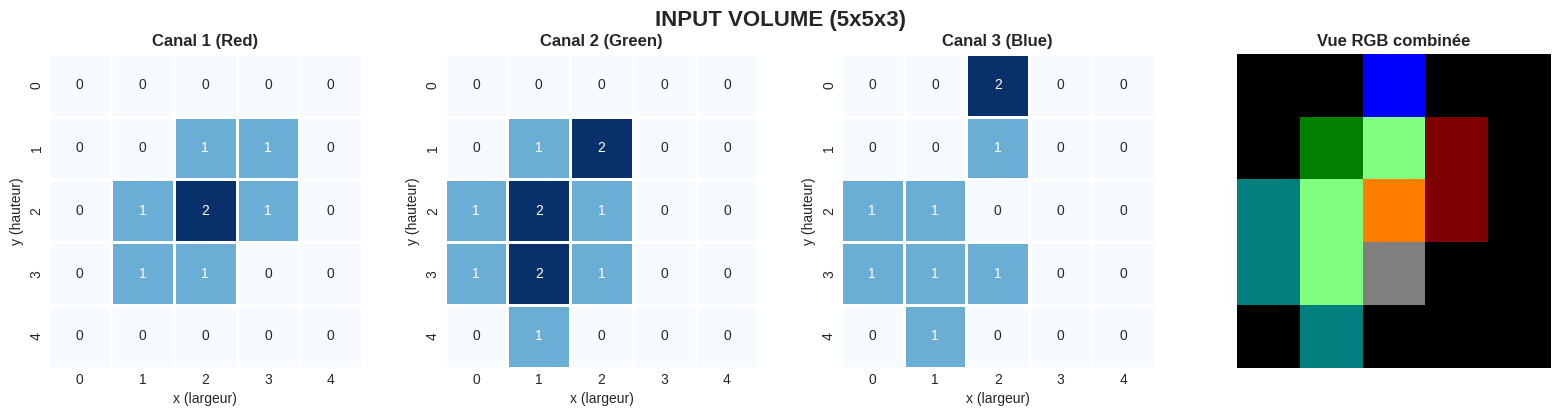

In [5]:


fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('INPUT VOLUME (5x5x3)', fontsize=16, fontweight='bold')

# Visualiser chaque canal séparément
channel_names = ['Canal 1 (Red)', 'Canal 2 (Green)', 'Canal 3 (Blue)']
for i in range(3):
    sns.heatmap(input_volume[:, :, i],
                annot=True,
                fmt='.0f',
                cmap='Blues',
                cbar=False,
                ax=axes[i],
                square=True,
                linewidths=1)
    axes[i].set_title(channel_names[i], fontweight='bold')
    axes[i].set_xlabel('x (largeur)')
    axes[i].set_ylabel('y (hauteur)')

# Visualisation RGB combinée
rgb_normalized = (input_volume - input_volume.min()) / (input_volume.max() - input_volume.min() + 1e-8)
axes[3].imshow(rgb_normalized)
axes[3].set_title('Vue RGB combinée', fontweight='bold')
axes[3].axis('off')

plt.tight_layout()
plt.show()


In [6]:


print("\n" + "="*70)
print("ÉTAPE 2: CONSTRUCTION DU RÉSEAU CNN")
print("="*70)

# Ajouter une dimension batch pour TensorFlow (batch_size, height, width, channels)
input_batch = np.expand_dims(input_volume, axis=0)
print(f"\nDimensions avec batch: {input_batch.shape}")
print(f"  Format TensorFlow: (batch_size, height, width, channels)")

# Construction du modèle CNN simple
model = keras.Sequential([
    layers.Input(shape=(5, 5, 3)),

    # Couche de convolution SANS activation, SANS pooling
    # 2 filtres de taille 3x3x3
    layers.Conv2D(
        filters=2,              # Nombre de filtres (feature maps en sortie)
        kernel_size=(3, 3),     # Taille du filtre: 3x3
        strides=(2, 2),         # Stride = 2 (comme dans l'image)
        padding='same',        # Padding = 1
        use_bias=True,          # Avec bias
        activation=None,        # PAS d'activation
        name='conv2d_layer'
    )
])

print("\n" + "-"*70)
print("ARCHITECTURE DU MODÈLE CNN")
print("-"*70)
model.summary()



ÉTAPE 2: CONSTRUCTION DU RÉSEAU CNN

Dimensions avec batch: (1, 5, 5, 3)
  Format TensorFlow: (batch_size, height, width, channels)

----------------------------------------------------------------------
ARCHITECTURE DU MODÈLE CNN
----------------------------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_layer (Conv2D)           │ (None, 3, 3, 2)        │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:


print("\n" + "="*70)
print("ÉTAPE 3: TERMINOLOGIE TENSORFLOW POUR LES CNN")
print("="*70)

print("""
┌─────────────────────────────────────────────────────────────────┐
│                    TERMINOLOGIE CNN - TENSORFLOW                │
├─────────────────────────────────────────────────────────────────┤
│                                                                 │
│ 1. INPUT SHAPE (input_shape)                                    │
│    Format : (height, width, channels)                           │
│    Exemple : (5, 5, 3) = image 5x5 pixels avec 3 canaux RGB     │
│                                                                 │
│ 2. FILTERS (filters)                                            │
│    Nombre de filtres = nombre de feature maps en sortie          │
│    Chaque filtre détecte une caractéristique différente          │
│    Exemple : filters=2 → 2 feature maps en sortie                │
│                                                                 │
│ 3. KERNEL SIZE (kernel_size)                                    │
│    Taille du filtre de convolution                               │
│    Format : (height, width)                                      │
│    Exemple : (3, 3) = filtre de 3x3 pixels                       │
│                                                                 │
│ 4. STRIDES (strides)                                            │
│    Pas de déplacement du filtre                                  │
│    Format : (vertical_stride, horizontal_stride)                 │
│    Exemple : (2, 2) = le filtre saute 2 pixels à chaque fois     │
│                                                                 │
│ 5. PADDING (padding)                                            │
│    - 'valid' : pas de padding → taille réduite                   │
│    - 'same'  : padding ajouté → conserve la même taille           │
│                                                                 │
│ 6. ACTIVATION (activation)                                      │
│    Fonction d'activation après convolution                       │
│    None = pas d'activation (convolution pure)                    │
│    Autres : 'relu', 'sigmoid', 'tanh', etc.                      │
│                                                                 │
│ 7. USE_BIAS (use_bias)                                          │
│    True = ajoute un biais b à chaque filtre                      │
│    Formule : output = conv(input, weights) + bias                │
│                                                                 │
└─────────────────────────────────────────────────────────────────┘
""")



ÉTAPE 3: TERMINOLOGIE TENSORFLOW POUR LES CNN

┌─────────────────────────────────────────────────────────────────┐
│                    TERMINOLOGIE CNN - TENSORFLOW                │
├─────────────────────────────────────────────────────────────────┤
│                                                                 │
│ 1. INPUT SHAPE (input_shape)                                    │
│    Format : (height, width, channels)                           │
│    Exemple : (5, 5, 3) = image 5x5 pixels avec 3 canaux RGB     │
│                                                                 │
│ 2. FILTERS (filters)                                            │
│    Nombre de filtres = nombre de feature maps en sortie          │
│    Chaque filtre détecte une caractéristique différente          │
│    Exemple : filters=2 → 2 feature maps en sortie                │
│                                                                 │
│ 3. KERNEL SIZE (kernel_size)                                   

In [8]:


print("\n" + "="*70)
print("ÉTAPE 4: CALCUL DE LA TAILLE DE SORTIE")
print("="*70)

def calculate_output_size(input_size, kernel_size, stride, padding):
    """Calcule la taille de sortie d'une convolution"""
    if padding == 'valid':
        pad = 0
    else:  # 'same'
        pad = (kernel_size - 1) // 2

    output_size = ((input_size + 2*pad - kernel_size) // stride) + 1
    return output_size

input_h, input_w = 5, 5
kernel_h, kernel_w = 3, 3
stride = 2
padding_type = 'same'

output_h = calculate_output_size(input_h, kernel_h, stride, padding_type)
output_w = calculate_output_size(input_w, kernel_w, stride, padding_type)

print(f"""
Formule de calcul:
  Output_size = ((Input_size - Kernel_size + 2×Padding) / Stride) + 1

Calculs pour notre exemple:
  - Input: {input_h}×{input_w}×3
  - Kernel: {kernel_h}×{kernel_w}×3
  - Stride: {stride}
  - Padding: {padding_type} (= 1)
  - Filters: 2

  Hauteur sortie = (({input_h} - {kernel_h} + 2×1) / {stride}) + 1 = {output_h}
  Largeur sortie = (({input_w} - {kernel_w} + 2×1) / {stride}) + 1 = {output_w}

  → SORTIE: {output_h}×{output_w}×2
""")


ÉTAPE 4: CALCUL DE LA TAILLE DE SORTIE

Formule de calcul:
  Output_size = ((Input_size - Kernel_size + 2×Padding) / Stride) + 1

Calculs pour notre exemple:
  - Input: 5×5×3
  - Kernel: 3×3×3
  - Stride: 2
  - Padding: same (= 1)
  - Filters: 2

  Hauteur sortie = ((5 - 3 + 2×1) / 2) + 1 = 3
  Largeur sortie = ((5 - 3 + 2×1) / 2) + 1 = 3

  → SORTIE: 3×3×2



In [9]:


print("\n" + "="*70)
print("ÉTAPE 5: APPLICATION DE LA CONVOLUTION")
print("="*70)

# Appliquer la convolution
output = model.predict(input_batch, verbose=0)

print(f"\nDimensions de sortie: {output.shape}")
print(f"  - Batch size: {output.shape[0]}")
print(f"  - Hauteur: {output.shape[1]}")
print(f"  - Largeur: {output.shape[2]}")
print(f"  - Feature maps: {output.shape[3]}")



ÉTAPE 5: APPLICATION DE LA CONVOLUTION

Dimensions de sortie: (1, 3, 3, 2)
  - Batch size: 1
  - Hauteur: 3
  - Largeur: 3
  - Feature maps: 2


In [10]:



print("\n" + "="*70)
print("ÉTAPE 6: EXTRACTION DES POIDS ET BIAIS")
print("="*70)

# Récupérer les poids de la couche de convolution
weights, biases = model.layers[0].get_weights()

print(f"\nDimensions des poids (kernels): {weights.shape}")
print(f"  Format: (kernel_height, kernel_width, input_channels, output_filters)")
print(f"  - Taille du filtre: {weights.shape[0]}×{weights.shape[1]}")
print(f"  - Canaux d'entrée: {weights.shape[2]}")
print(f"  - Nombre de filtres: {weights.shape[3]}")

print(f"\nDimensions des biais: {biases.shape}")
print(f"  - Un biais par filtre: {biases.shape[0]} biais")


ÉTAPE 6: EXTRACTION DES POIDS ET BIAIS

Dimensions des poids (kernels): (3, 3, 3, 2)
  Format: (kernel_height, kernel_width, input_channels, output_filters)
  - Taille du filtre: 3×3
  - Canaux d'entrée: 3
  - Nombre de filtres: 2

Dimensions des biais: (2,)
  - Un biais par filtre: 2 biais



ÉTAPE 7: VISUALISATION DES FILTRES


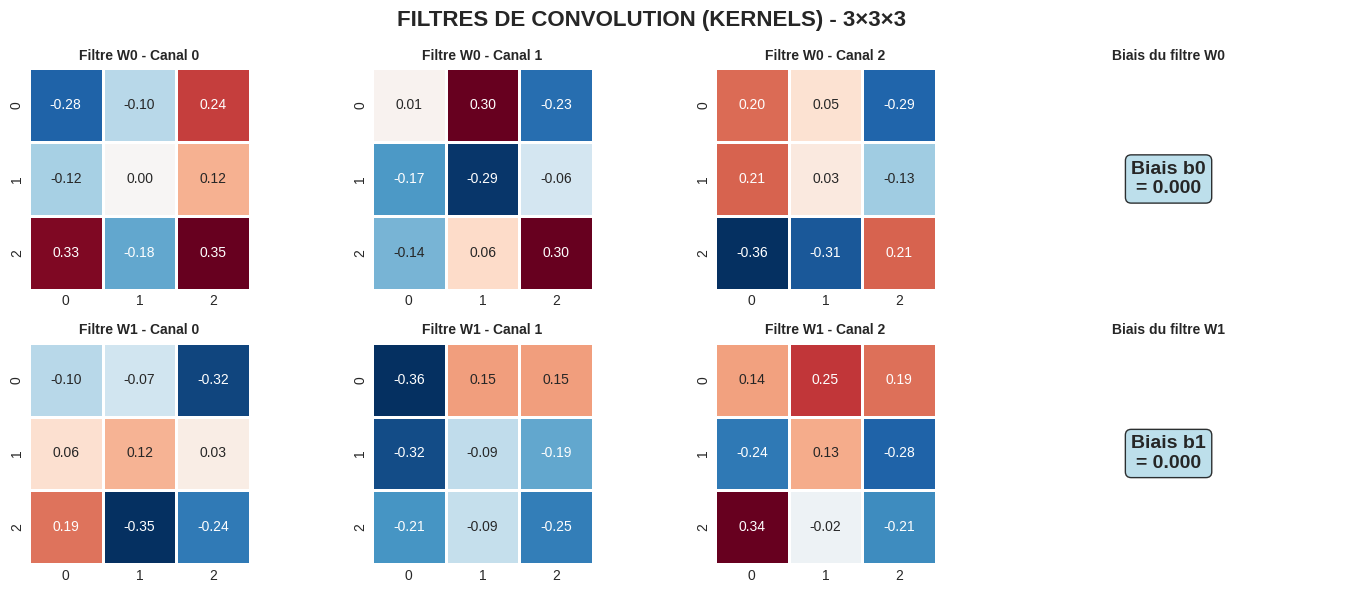

In [11]:
print("\n" + "="*70)
print("ÉTAPE 7: VISUALISATION DES FILTRES")
print("="*70)

n_filters = weights.shape[3]
n_channels = weights.shape[2]

fig, axes = plt.subplots(n_filters, n_channels + 1, figsize=(14, 6))
fig.suptitle('FILTRES DE CONVOLUTION (KERNELS) - 3×3×3', fontsize=16, fontweight='bold')

for f in range(n_filters):
    for c in range(n_channels):
        ax = axes[f, c] if n_filters > 1 else axes[c]
        sns.heatmap(weights[:, :, c, f],
                    annot=True,
                    fmt='.2f',
                    cmap='RdBu_r',
                    center=0,
                    cbar=False,
                    ax=ax,
                    square=True,
                    linewidths=1)
        ax.set_title(f'Filtre W{f} - Canal {c}', fontsize=10, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Afficher le biais
    ax_bias = axes[f, n_channels] if n_filters > 1 else axes[n_channels]
    ax_bias.text(0.5, 0.5, f'Biais b{f}\n= {biases[f]:.3f}',
                 ha='center', va='center', fontsize=14, fontweight='bold',
                 bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    ax_bias.axis('off')
    ax_bias.set_title(f'Biais du filtre W{f}', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()



ÉTAPE 8: VISUALISATION DES FEATURE MAPS


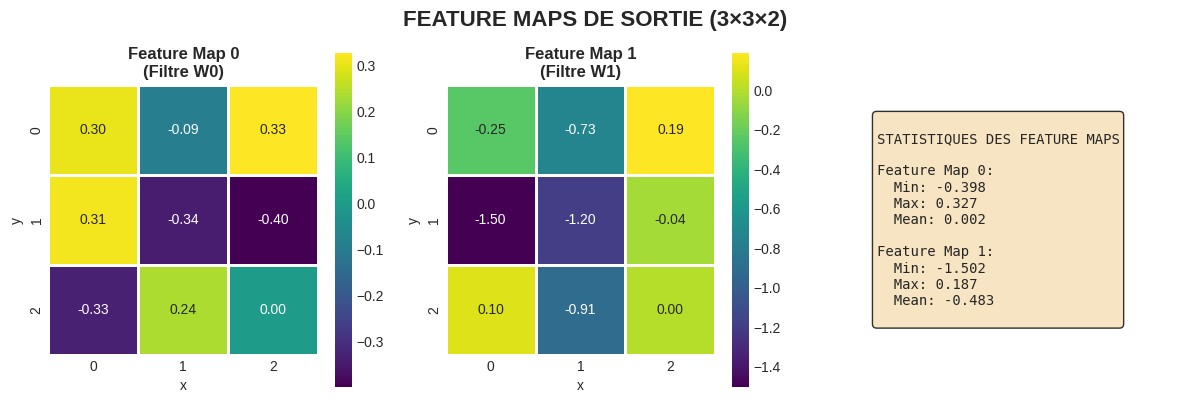

In [12]:
print("\n" + "="*70)
print("ÉTAPE 8: VISUALISATION DES FEATURE MAPS")
print("="*70)

# Retirer la dimension batch
output_features = output[0]

fig, axes = plt.subplots(1, n_filters + 1, figsize=(12, 4))
fig.suptitle(f'FEATURE MAPS DE SORTIE ({output_h}×{output_w}×{n_filters})',
             fontsize=16, fontweight='bold')

for f in range(n_filters):
    sns.heatmap(output_features[:, :, f],
                annot=True,
                fmt='.2f',
                cmap='viridis',
                cbar=True,
                ax=axes[f],
                square=True,
                linewidths=1)
    axes[f].set_title(f'Feature Map {f}\n(Filtre W{f})', fontweight='bold')
    axes[f].set_xlabel('x')
    axes[f].set_ylabel('y')

# Afficher les valeurs min/max
ax_info = axes[n_filters]
info_text = f"""
STATISTIQUES DES FEATURE MAPS

Feature Map 0:
  Min: {output_features[:, :, 0].min():.3f}
  Max: {output_features[:, :, 0].max():.3f}
  Mean: {output_features[:, :, 0].mean():.3f}

Feature Map 1:
  Min: {output_features[:, :, 1].min():.3f}
  Max: {output_features[:, :, 1].max():.3f}
  Mean: {output_features[:, :, 1].mean():.3f}
"""
ax_info.text(0.1, 0.5, info_text,
             ha='left', va='center', fontsize=10, family='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
ax_info.axis('off')

plt.tight_layout()
plt.show()


ÉTAPE 9: VISUALISATION DU PROCESSUS COMPLET DE CONVOLUTION


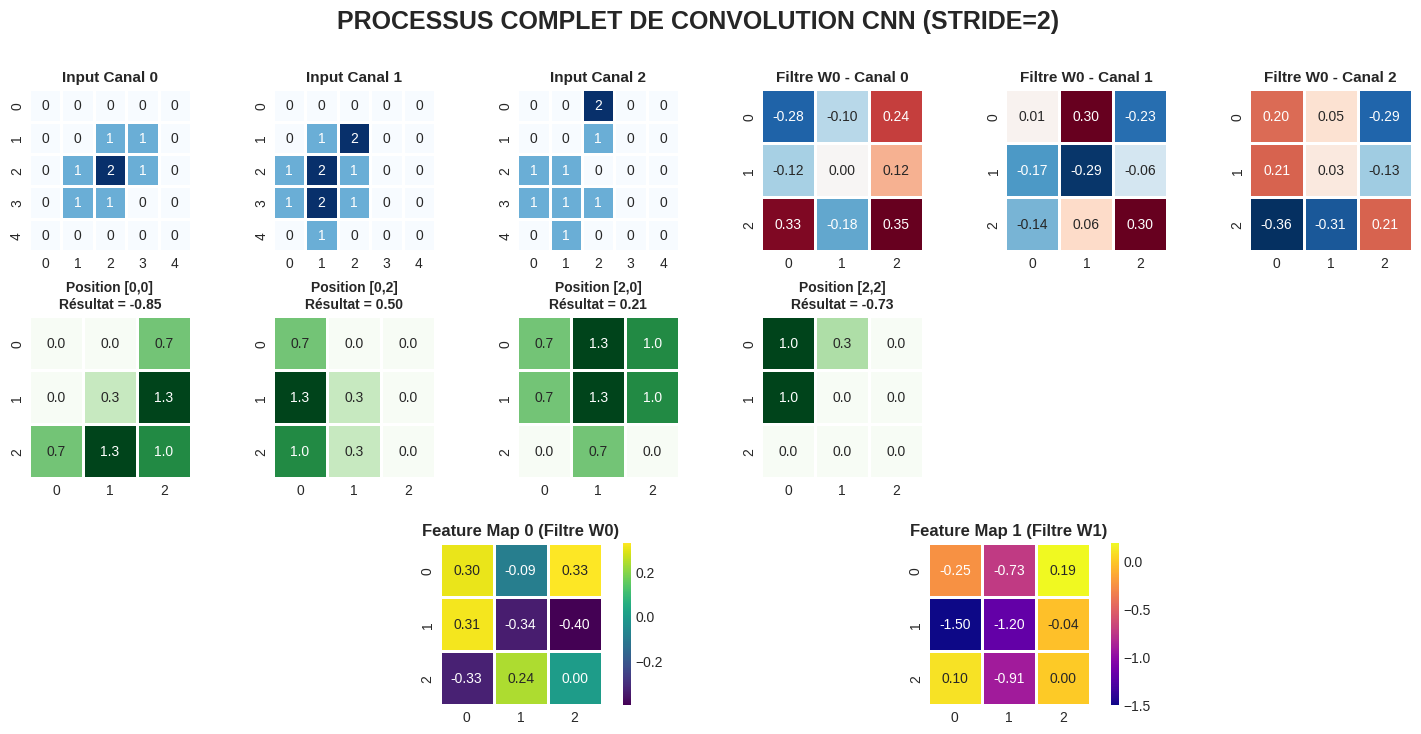

In [13]:
print("\n" + "="*70)
print("ÉTAPE 9: VISUALISATION DU PROCESSUS COMPLET DE CONVOLUTION")
print("="*70)

fig = plt.figure(figsize=(18, 8))
gs = fig.add_gridspec(3, 6, hspace=0.4, wspace=0.4)

# Titre principal
fig.suptitle('PROCESSUS COMPLET DE CONVOLUTION CNN (STRIDE=2)',
             fontsize=18, fontweight='bold', y=0.98)

# INPUT VOLUME (première ligne - 3 canaux)
for i in range(3):
    ax = fig.add_subplot(gs[0, i])
    sns.heatmap(input_volume[:, :, i],
                annot=True, fmt='.0f', cmap='Blues',
                cbar=False, ax=ax, square=True, linewidths=1)
    ax.set_title(f'Input Canal {i}', fontweight='bold', fontsize=11)

# FILTRES (première ligne - 3 canaux du filtre 0)
for c in range(3):
    ax = fig.add_subplot(gs[0, c+3])
    sns.heatmap(weights[:, :, c, 0],
                annot=True, fmt='.2f', cmap='RdBu_r',
                center=0, cbar=False, ax=ax, square=True, linewidths=1)
    ax.set_title(f'Filtre W0 - Canal {c}', fontweight='bold', fontsize=11)

# Positions de la convolution avec stride=2
positions = [(0, 0), (0, 2), (2, 0), (2, 2)]
position_labels = ['Position [0,0]', 'Position [0,2]', 'Position [2,0]', 'Position [2,2]']

for idx, (pos_y, pos_x) in enumerate(positions):
    ax = fig.add_subplot(gs[1, idx])

    # Extraire la région 3x3 à cette position
    region = input_volume[pos_y:pos_y+3, pos_x:pos_x+3, :]

    # Calculer manuellement la convolution pour cette position
    conv_result = 0
    for c in range(3):
        conv_result += np.sum(region[:, :, c] * weights[:, :, c, 0])
    conv_result += biases[0]

    # Visualiser la région
    region_2d = region.mean(axis=2)  # Moyenne sur les canaux pour visualisation
    sns.heatmap(region_2d,
                annot=True, fmt='.1f', cmap='Greens',
                cbar=False, ax=ax, square=True, linewidths=1)
    ax.set_title(f'{position_labels[idx]}\nRésultat = {conv_result:.2f}',
                 fontweight='bold', fontsize=10)

# Feature maps finales
ax1 = fig.add_subplot(gs[2, 1:3])
sns.heatmap(output_features[:, :, 0],
            annot=True, fmt='.2f', cmap='viridis',
            cbar=True, ax=ax1, square=True, linewidths=1)
ax1.set_title('Feature Map 0 (Filtre W0)', fontweight='bold', fontsize=12)

ax2 = fig.add_subplot(gs[2, 3:5])
sns.heatmap(output_features[:, :, 1],
            annot=True, fmt='.2f', cmap='plasma',
            cbar=True, ax=ax2, square=True, linewidths=1)
ax2.set_title('Feature Map 1 (Filtre W1)', fontweight='bold', fontsize=12)

plt.show()


ÉTAPE 10: ANIMATION COMPLÈTE AVEC FLÈCHES EXPLICATIVES
🎬 ANIMATION COMPLÈTE AVEC FLÈCHES EXPLICATIVES 🎬

Génération des frames de l'animation...

📸 Frame 1/10 - Position: [0,0]


/tmp/ipython-input-4270922764.py:410: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


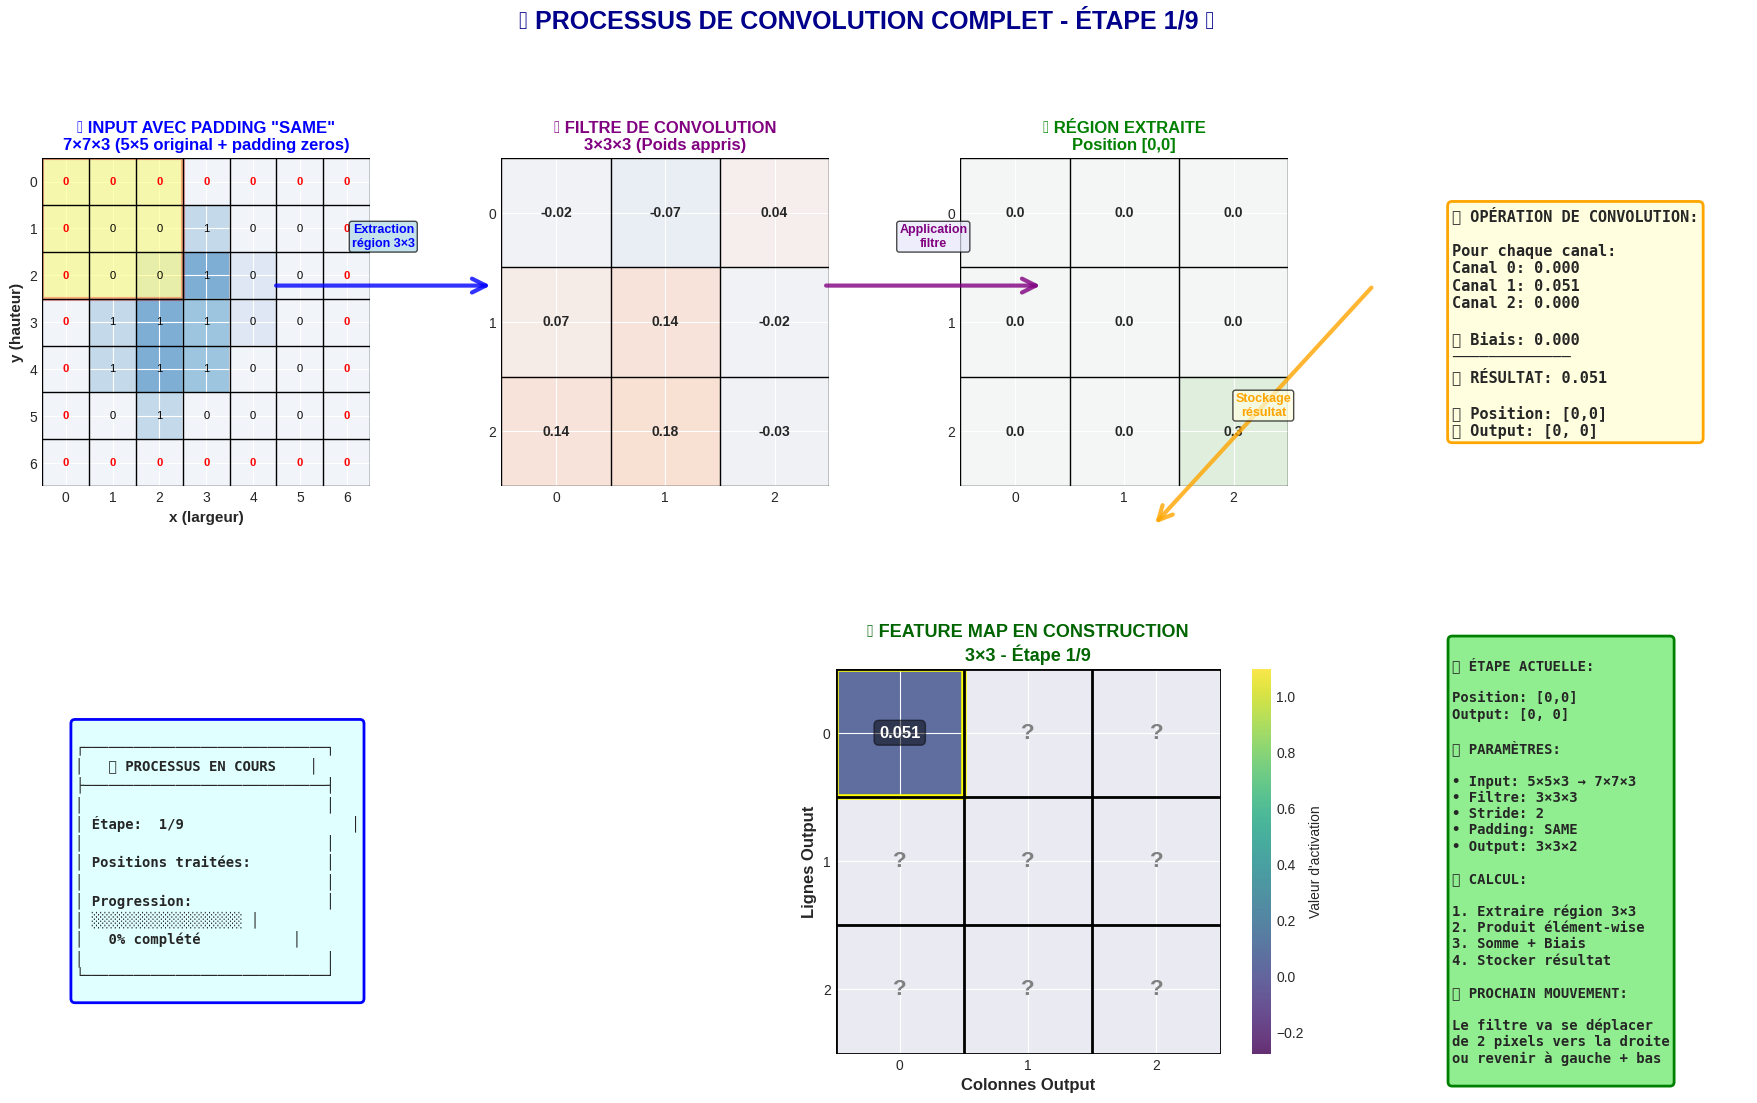

   ↳ Flèches explicatives: Input → Région → Filtre → Calcul → Output
📸 Frame 2/10 - Position: [0,2]


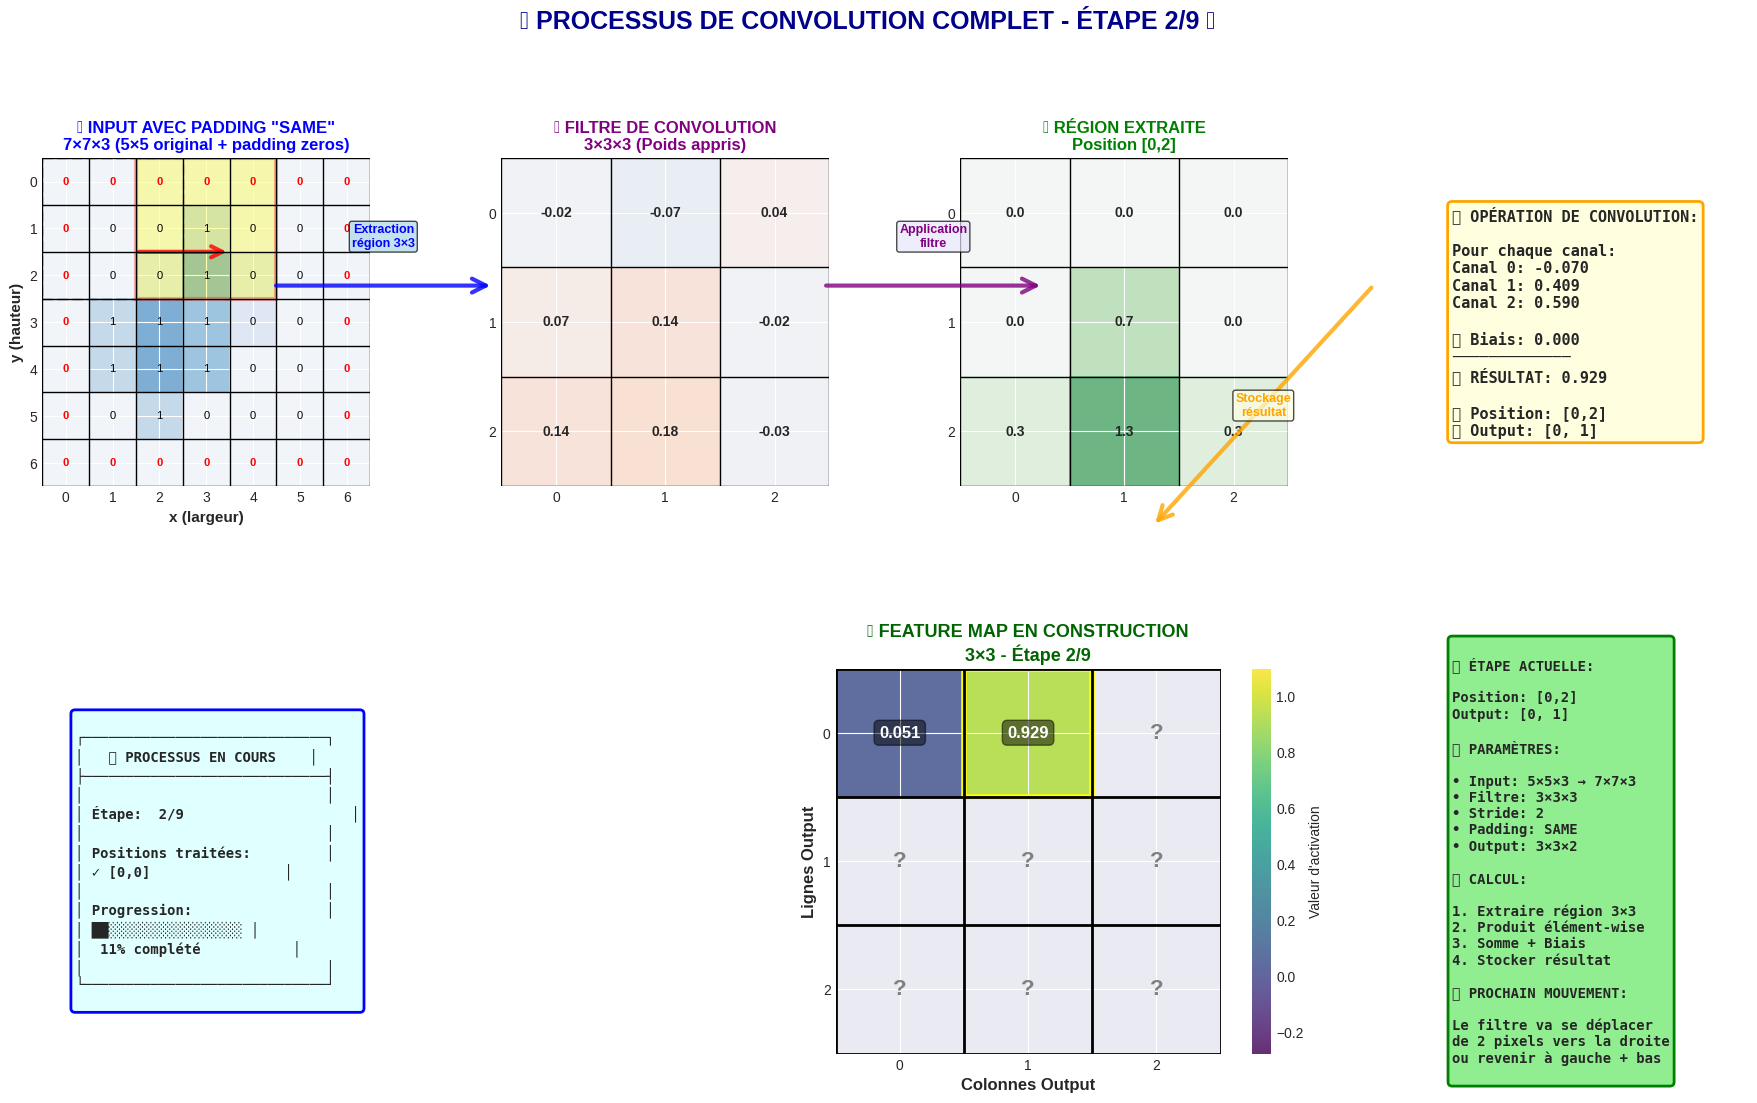

   ↳ Flèches explicatives: Input → Région → Filtre → Calcul → Output
📸 Frame 3/10 - Position: [0,4]


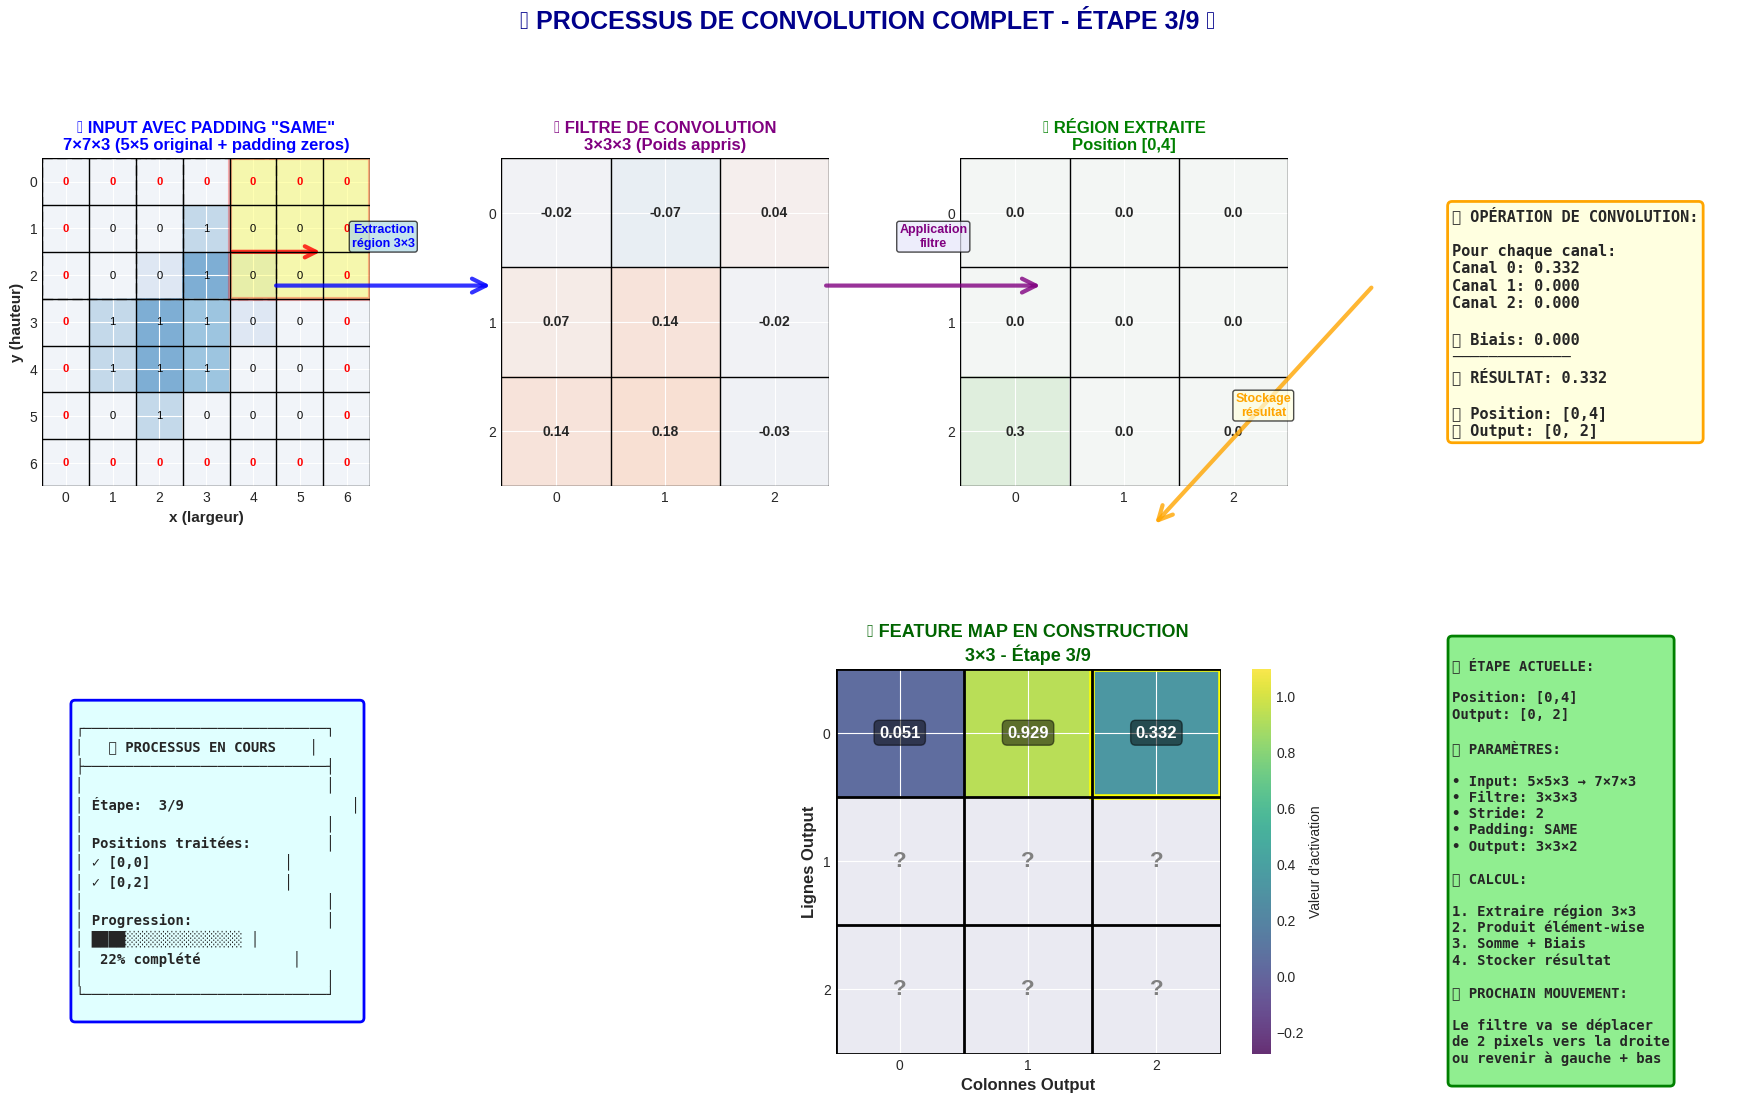

   ↳ Flèches explicatives: Input → Région → Filtre → Calcul → Output
📸 Frame 4/10 - Position: [2,0]


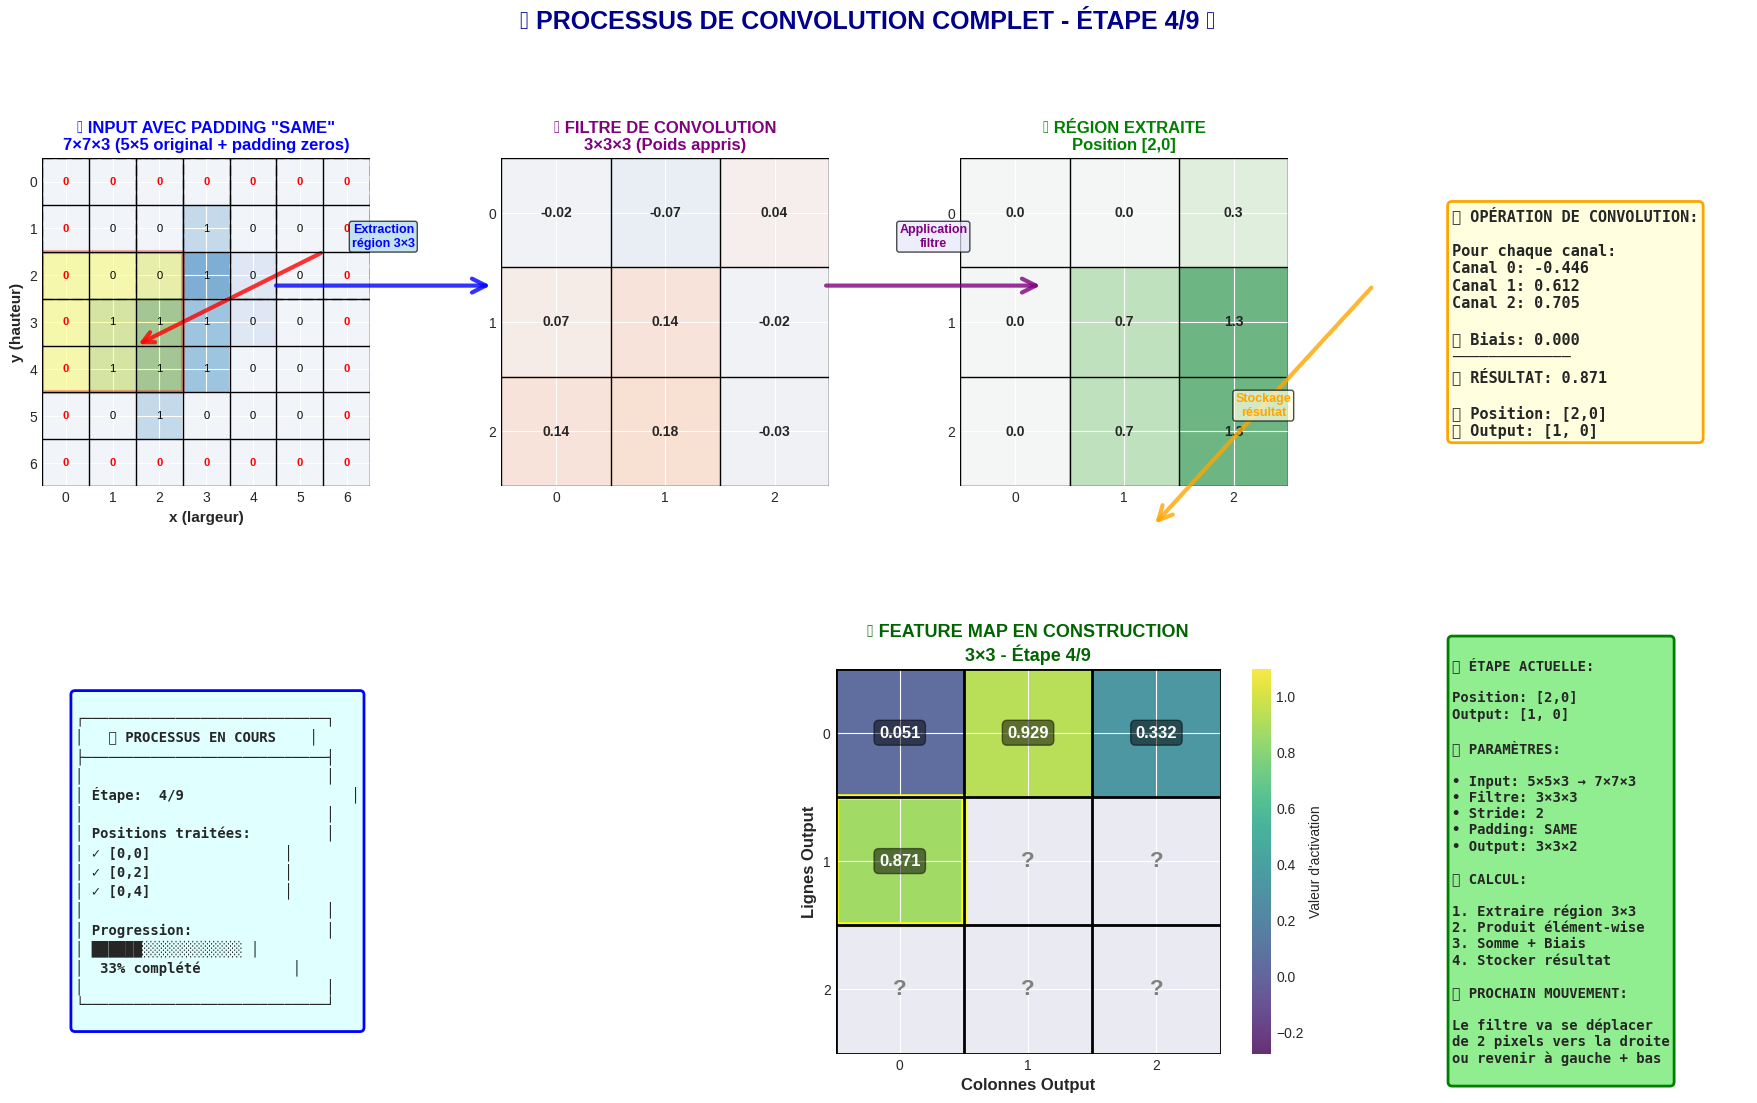

   ↳ Flèches explicatives: Input → Région → Filtre → Calcul → Output
📸 Frame 5/10 - Position: [2,2]


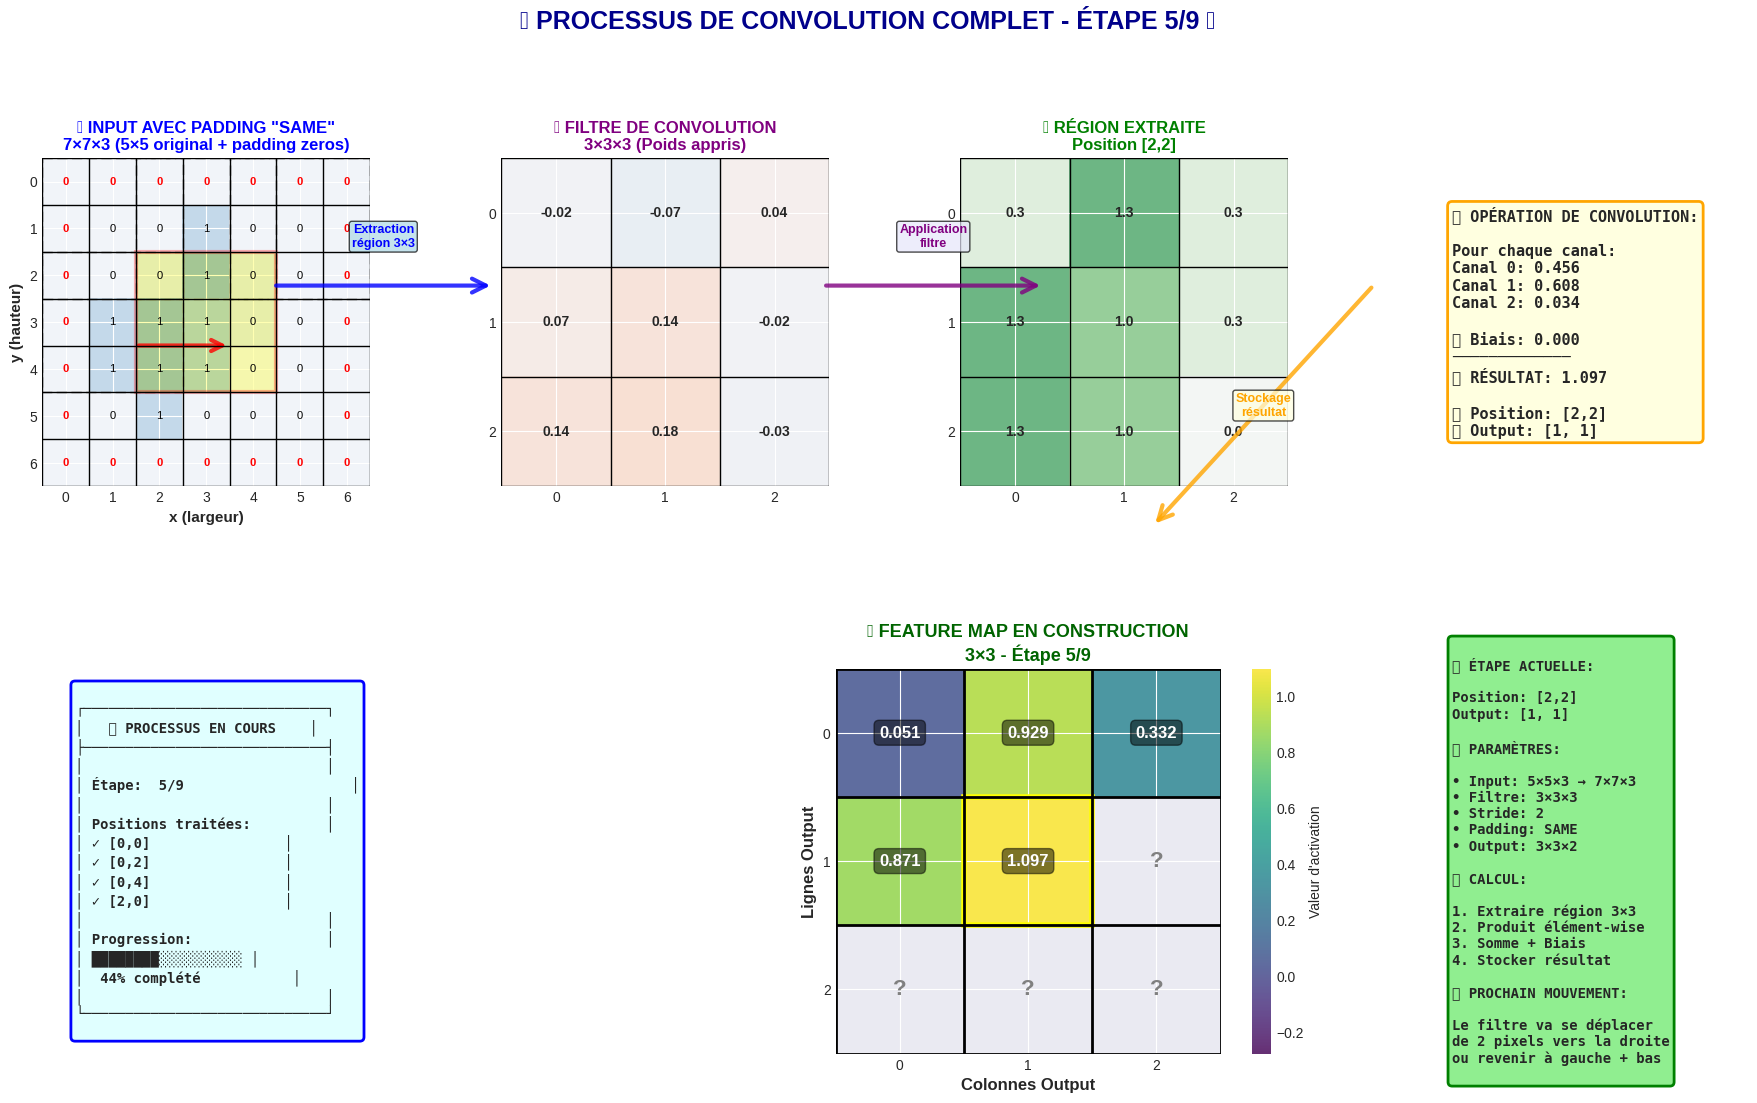

   ↳ Flèches explicatives: Input → Région → Filtre → Calcul → Output
📸 Frame 6/10 - Position: [2,4]


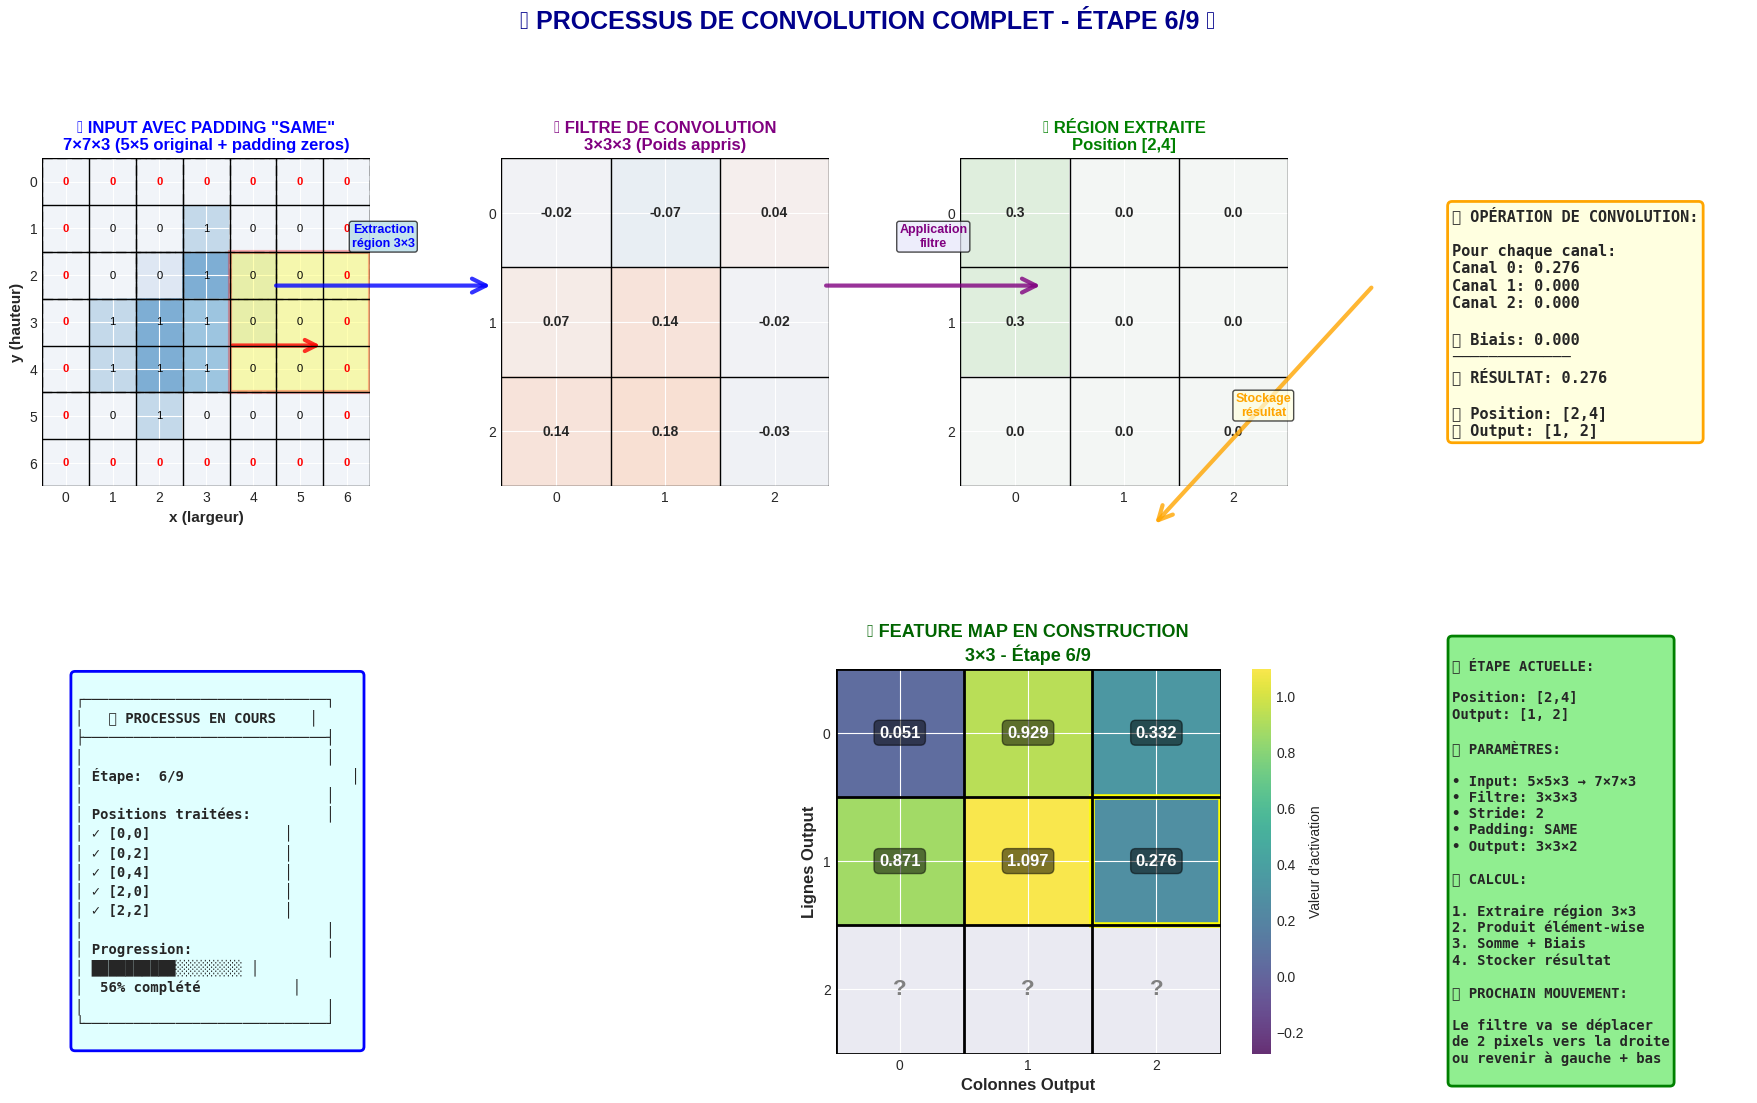

   ↳ Flèches explicatives: Input → Région → Filtre → Calcul → Output
📸 Frame 7/10 - Position: [4,0]


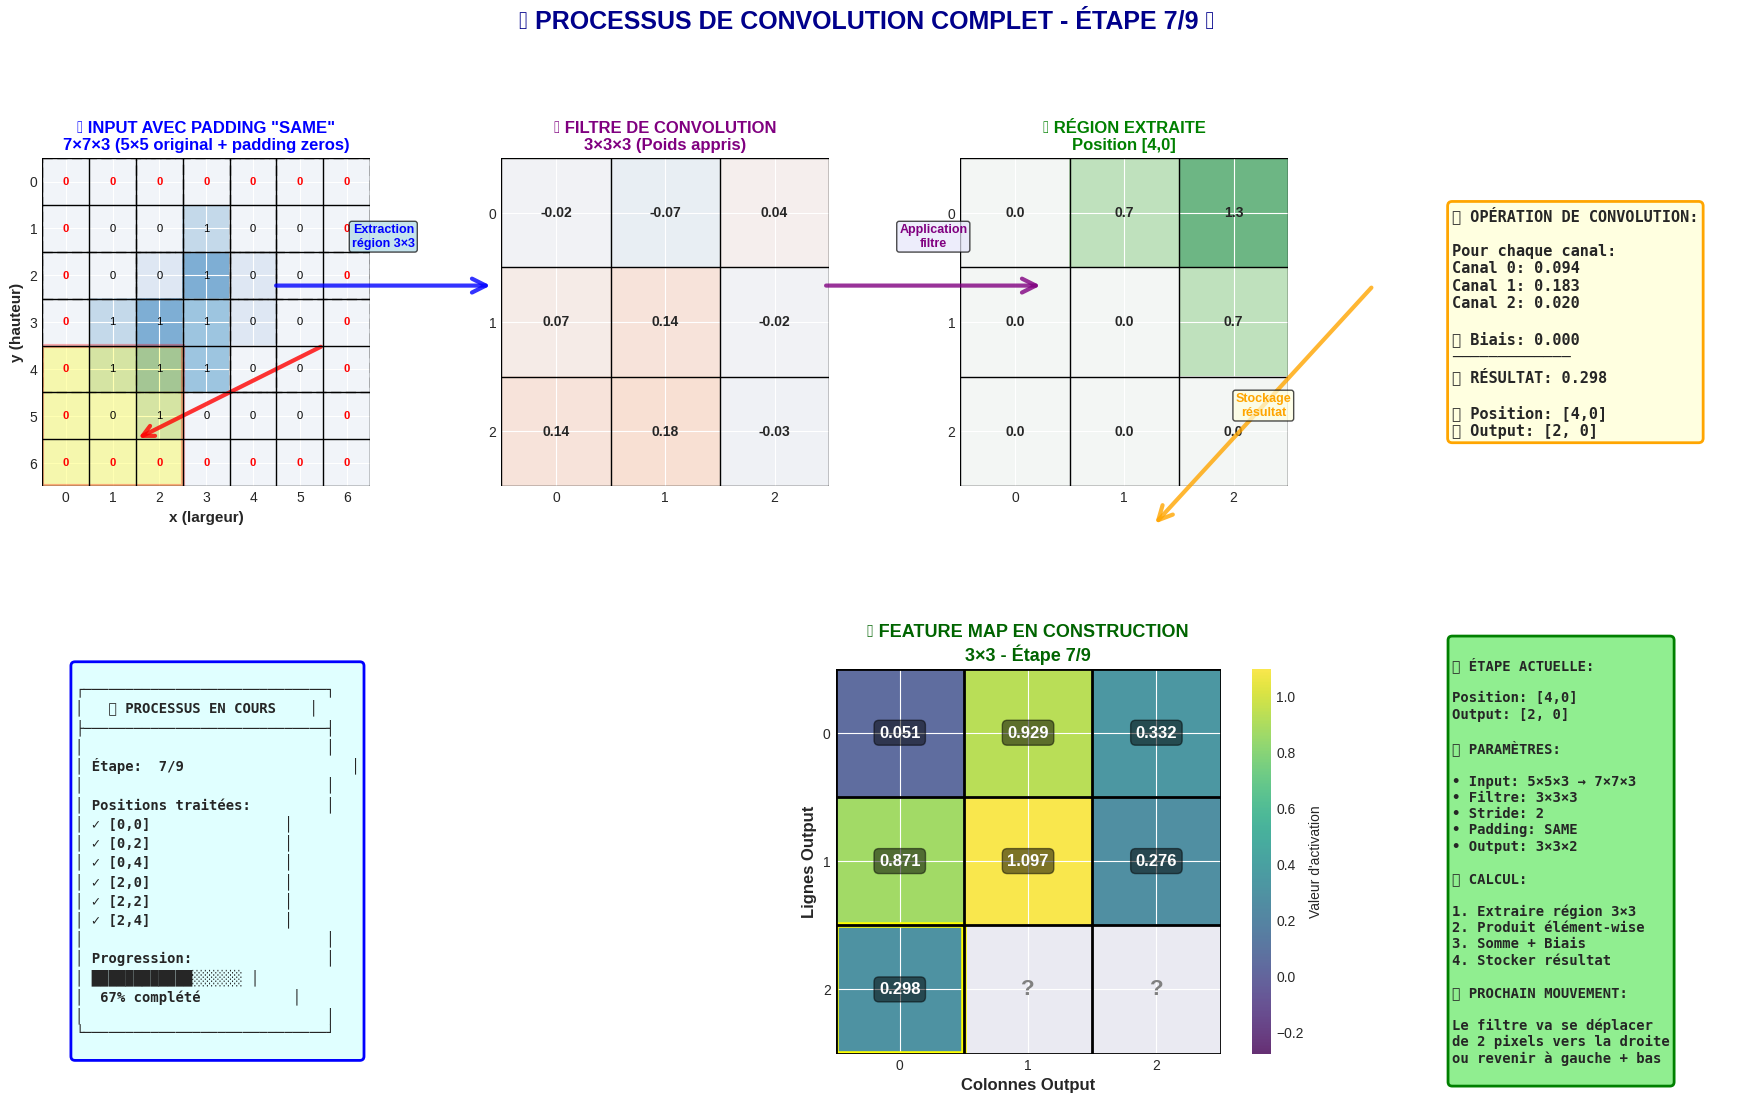

   ↳ Flèches explicatives: Input → Région → Filtre → Calcul → Output
📸 Frame 8/10 - Position: [4,2]


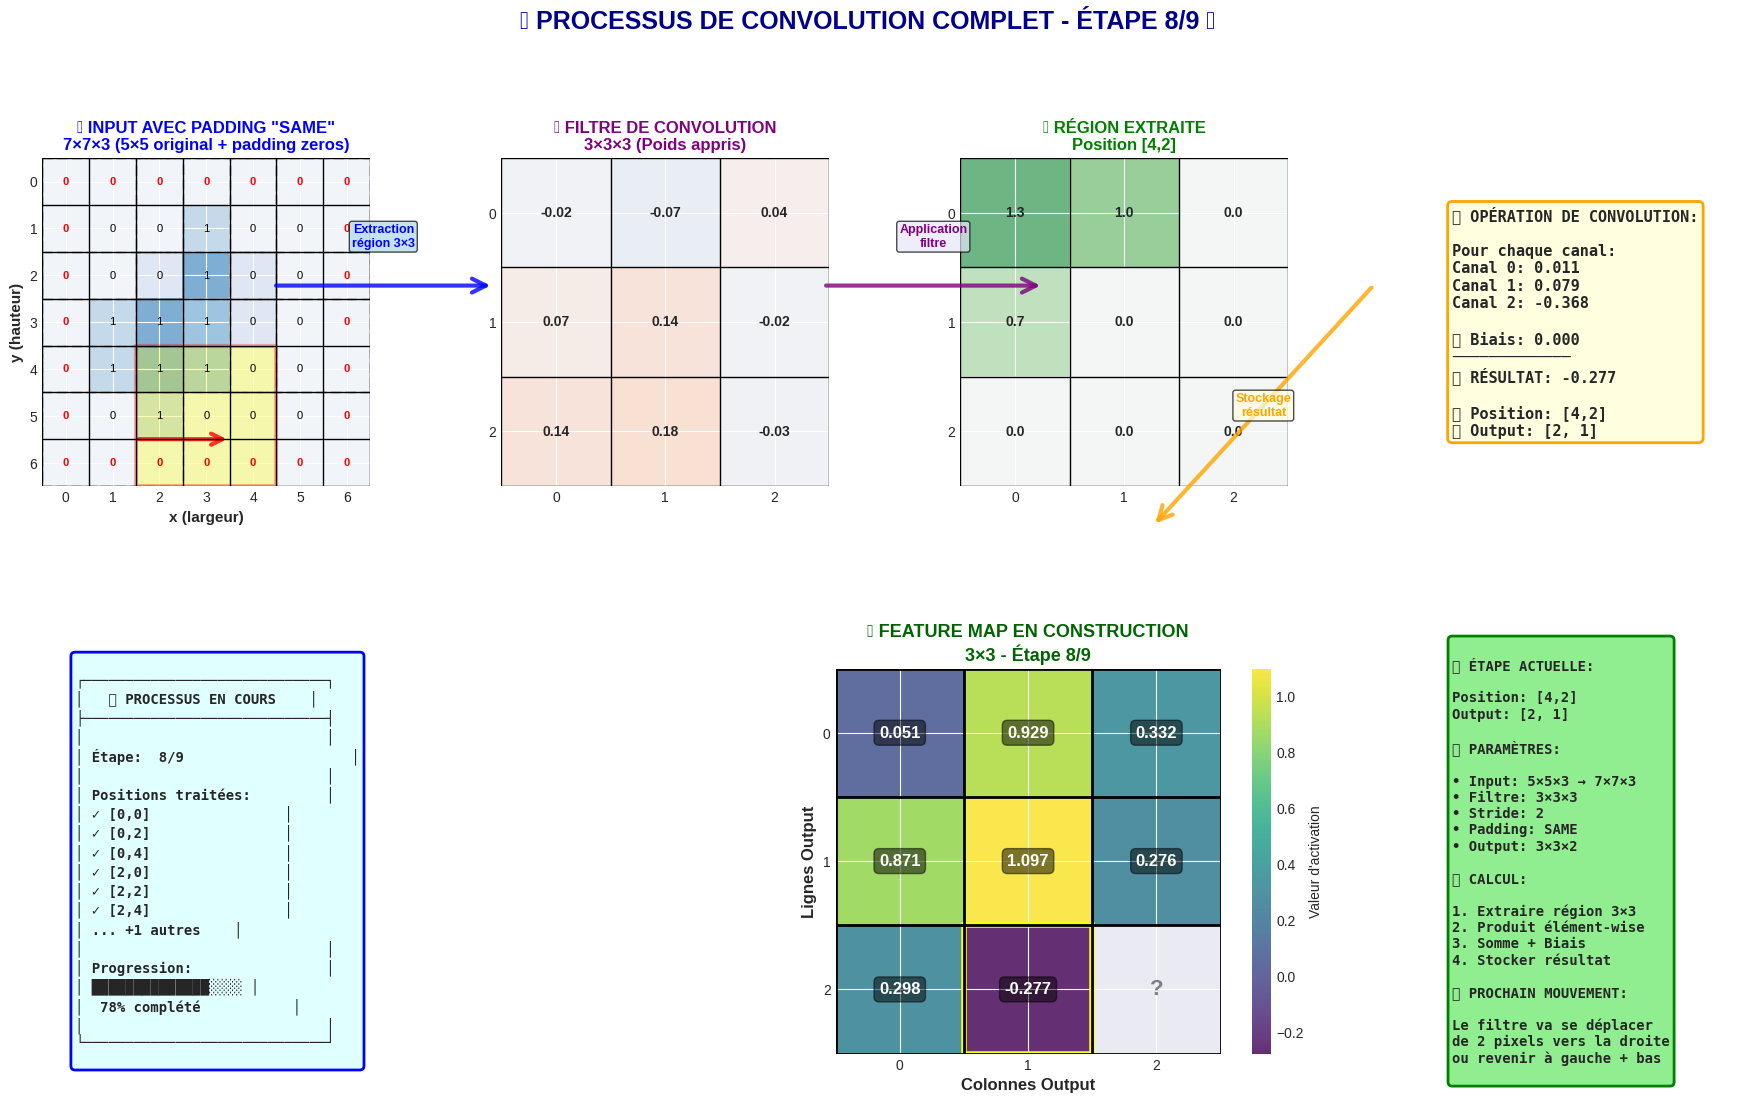

   ↳ Flèches explicatives: Input → Région → Filtre → Calcul → Output
📸 Frame 9/10 - Position: [4,4]


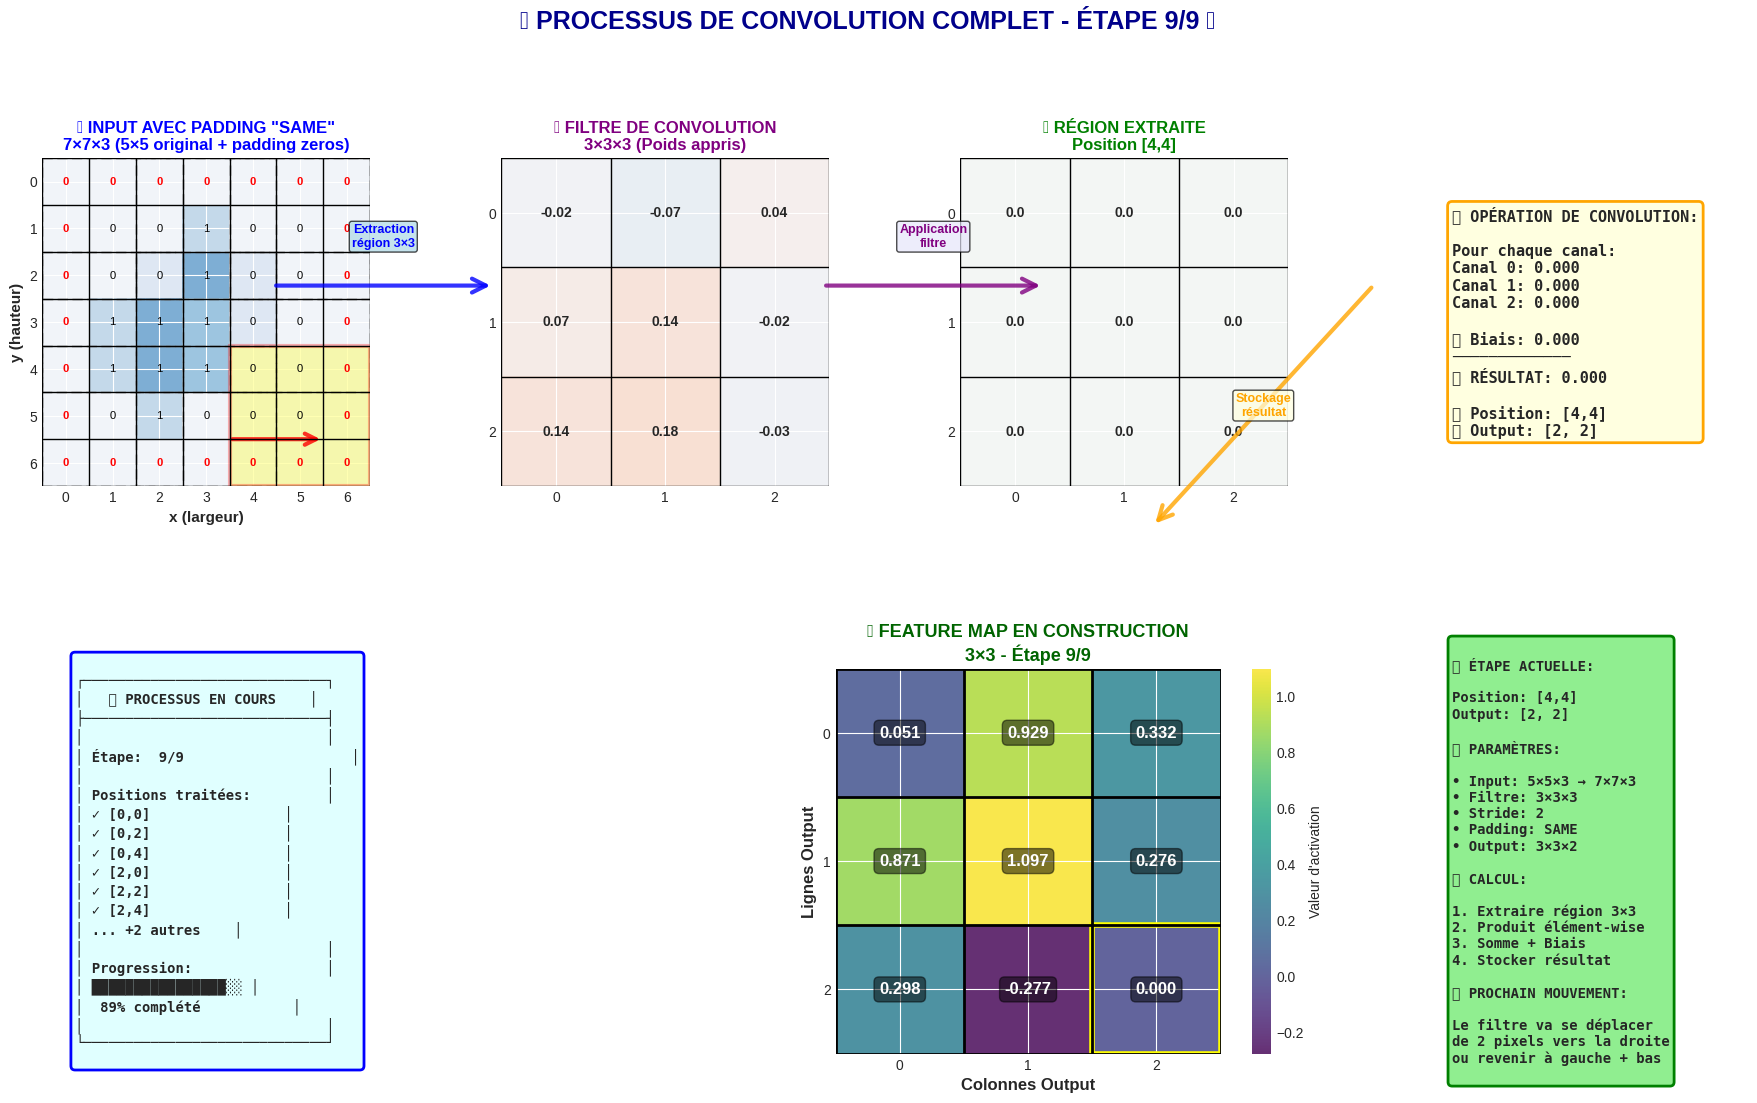

   ↳ Flèches explicatives: Input → Région → Filtre → Calcul → Output
📸 Frame 10/10 - Position: TERMINÉ


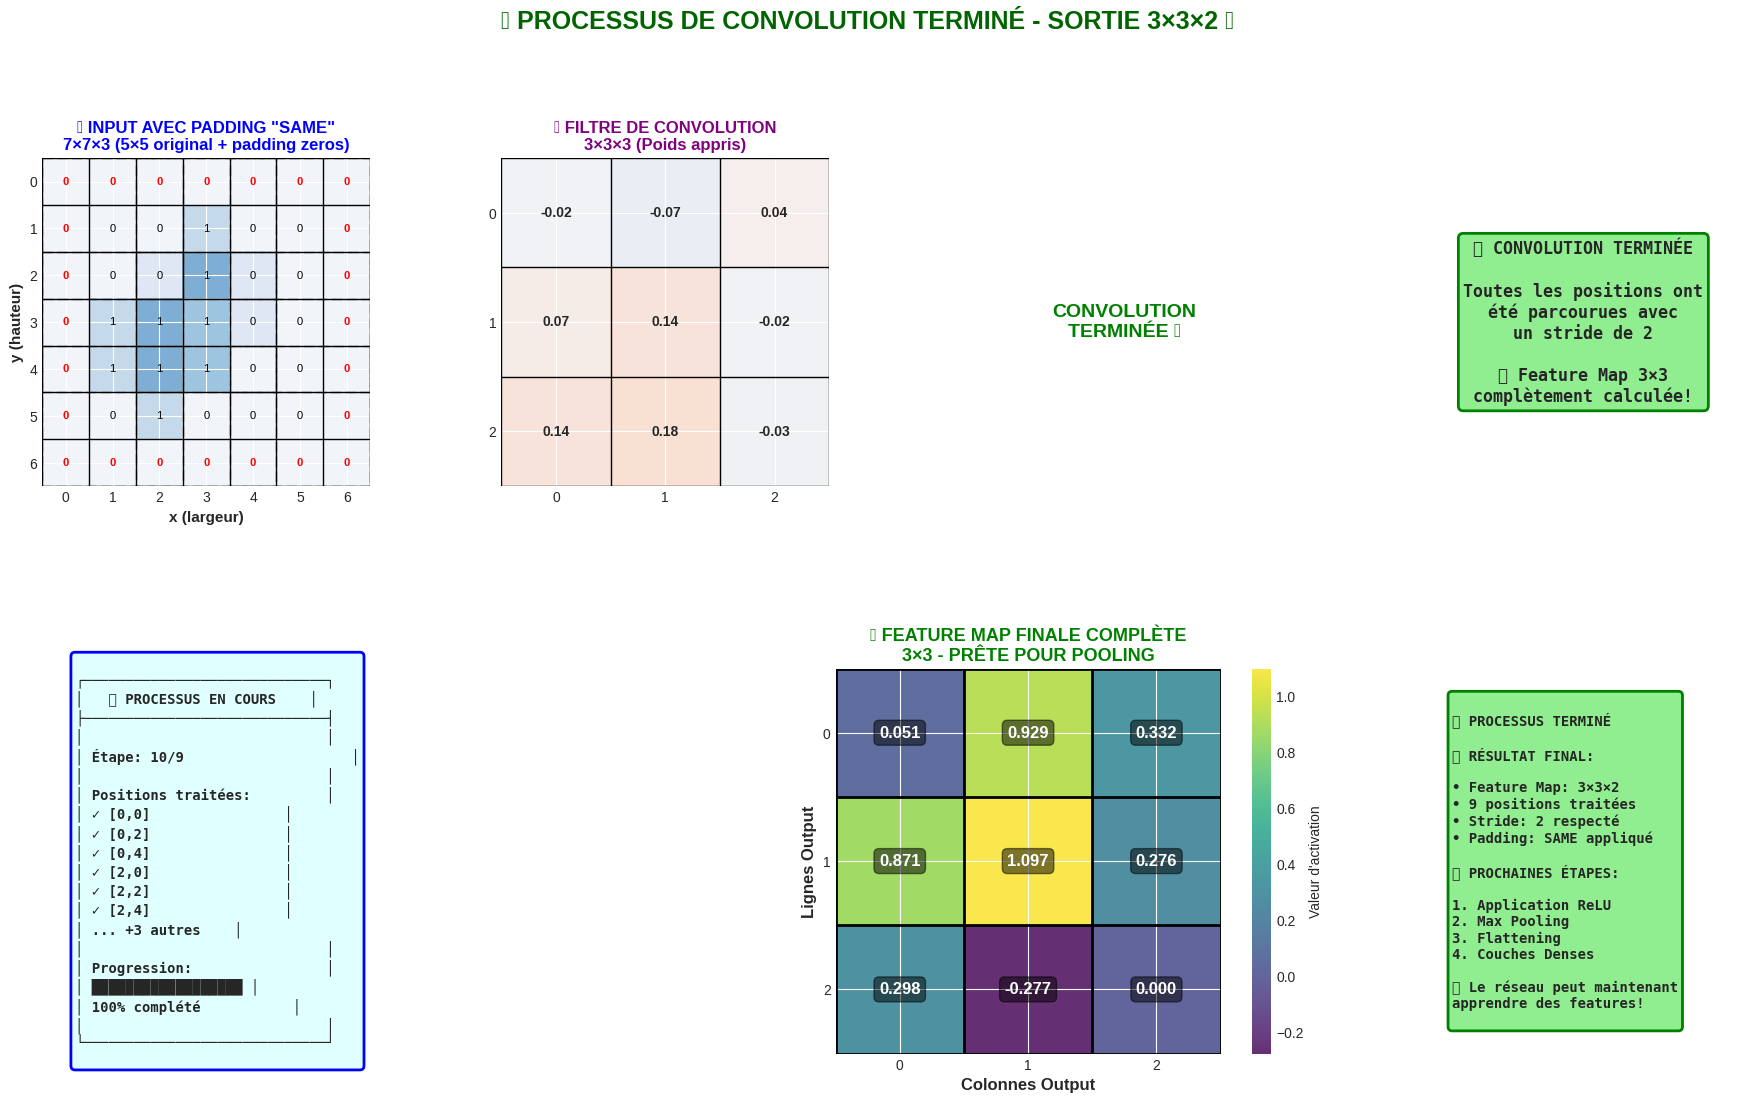

   ✅ Processus terminé - Feature Map 3×3 complète!

ANIMATION TERMINÉE - PROCESSUS COMPLET EXPLIQUÉ


In [42]:
from matplotlib.patches import Rectangle, FancyArrowPatch
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image
import matplotlib.patches as mpatches
from io import BytesIO
from PIL import Image as PILImage

# ==========================================
# ANIMATION COMPLÈTE AVEC FLÈCHES EXPLICATIVES
# ==========================================

print("\n" + "="*70)
print("ÉTAPE 10: ANIMATION COMPLÈTE AVEC FLÈCHES EXPLICATIVES")
print("="*70)

# Variables globales pour l'animation avec padding='same'
positions_same = [(0, 0), (0, 2), (0, 4), (2, 0), (2, 2), (2, 4), (4, 0), (4, 2), (4, 4)]
position_names_same = ['[0,0]', '[0,2]', '[0,4]', '[2,0]', '[2,2]', '[2,4]', '[4,0]', '[4,2]', '[4,4]']

def draw_convolution_step_same(step):
    """Dessine une étape du processus de convolution avec toutes les flèches explicatives"""
    fig = plt.figure(figsize=(22, 12))
    gs = fig.add_gridspec(2, 4, hspace=0.4, wspace=0.4)

    # Titre dynamique
    if step < len(positions_same):
        pos_y, pos_x = positions_same[step]
        fig.suptitle(f'🎬 PROCESSUS DE CONVOLUTION COMPLET - ÉTAPE {step+1}/{len(positions_same)} 🎬',
                     fontsize=18, fontweight='bold', color='darkblue')
    else:
        fig.suptitle(f'✅ PROCESSUS DE CONVOLUTION TERMINÉ - SORTIE 3×3×2 ✅',
                     fontsize=18, fontweight='bold', color='darkgreen')

    # ============ PARTIE 1: INPUT VOLUME AVEC PADDING ============
    ax_input = fig.add_subplot(gs[0, 0])

    # Créer l'input avec padding (pour visualization)
    input_with_padding = np.pad(input_volume, ((1,1), (1,1), (0,0)), mode='constant', constant_values=0)
    input_2d_padded = input_with_padding.mean(axis=2)

    im = ax_input.imshow(input_2d_padded, cmap='Blues', alpha=0.6, vmin=0, vmax=2)

    # Ajouter les valeurs
    for i in range(7):
        for j in range(7):
            color = 'red' if (i in [0, 6] or j in [0, 6]) else 'black'
            weight = 'bold' if (i in [0, 6] or j in [0, 6]) else 'normal'
            ax_input.text(j, i, f'{input_2d_padded[i, j]:.0f}',
                         ha='center', va='center', fontsize=8, fontweight=weight, color=color)

    # Dessiner la grille
    for i in range(8):
        ax_input.axhline(i-0.5, color='black', linewidth=1)
        ax_input.axvline(i-0.5, color='black', linewidth=1)

    # Afficher toutes les positions précédentes en gris
    for prev_step in range(min(step, len(positions_same))):
        prev_y, prev_x = positions_same[prev_step]
        rect = Rectangle((prev_x-0.5, prev_y-0.5), 3, 3,
                        linewidth=2, edgecolor='gray',
                        facecolor='none', linestyle='--', alpha=0.3)
        ax_input.add_patch(rect)

    # Dessiner la fenêtre de convolution actuelle
    if step < len(positions_same):
        pos_y, pos_x = positions_same[step]
        rect = Rectangle((pos_x-0.5, pos_y-0.5), 3, 3,
                        linewidth=3, edgecolor='red',
                        facecolor='yellow', alpha=0.3)
        ax_input.add_patch(rect)

        # Flèche montrant le mouvement du filtre
        if step > 0:
            prev_y, prev_x = positions_same[step-1]
            arrow_movement = FancyArrowPatch(
                (prev_x + 1.5, prev_y + 1.5),
                (pos_x + 1.5, pos_y + 1.5),
                arrowstyle='->', mutation_scale=20,
                linewidth=3, color='red', alpha=0.8
            )
            ax_input.add_patch(arrow_movement)

    ax_input.set_xlim(-0.5, 6.5)
    ax_input.set_ylim(6.5, -0.5)
    ax_input.set_xticks(range(7))
    ax_input.set_yticks(range(7))
    ax_input.set_xlabel('x (largeur)', fontsize=11, fontweight='bold')
    ax_input.set_ylabel('y (hauteur)', fontsize=11, fontweight='bold')
    ax_input.set_title('📥 INPUT AVEC PADDING "SAME"\n7×7×3 (5×5 original + padding zeros)',
                      fontsize=12, fontweight='bold', color='blue')

    # ============ PARTIE 2: FILTRE (KERNEL) ============
    ax_kernel = fig.add_subplot(gs[0, 1])

    # Afficher le filtre 0 (moyenne des 3 canaux)
    kernel_2d = weights_same[:, :, :, 0].mean(axis=2)
    im_kernel = ax_kernel.imshow(kernel_2d, cmap='RdBu_r', alpha=0.8, vmin=-1, vmax=1)

    for i in range(3):
        for j in range(3):
            ax_kernel.text(j, i, f'{kernel_2d[i, j]:.2f}',
                          ha='center', va='center', fontsize=10, fontweight='bold')

    for i in range(4):
        ax_kernel.axhline(i-0.5, color='black', linewidth=1)
        ax_kernel.axvline(i-0.5, color='black', linewidth=1)

    ax_kernel.set_xlim(-0.5, 2.5)
    ax_kernel.set_ylim(2.5, -0.5)
    ax_kernel.set_xticks(range(3))
    ax_kernel.set_yticks(range(3))
    ax_kernel.set_title('🔄 FILTRE DE CONVOLUTION\n3×3×3 (Poids appris)',
                       fontsize=12, fontweight='bold', color='purple')

    # ============ PARTIE 3: RÉGION EXTRAITE ============
    ax_region = fig.add_subplot(gs[0, 2])

    if step < len(positions_same):
        pos_y, pos_x = positions_same[step]

        # Extraire la région du input avec padding
        region = input_with_padding[pos_y:pos_y+3, pos_x:pos_x+3, :].mean(axis=2)

        im_region = ax_region.imshow(region, cmap='Greens', alpha=0.7, vmin=0, vmax=2)

        for i in range(3):
            for j in range(3):
                ax_region.text(j, i, f'{region[i, j]:.1f}',
                              ha='center', va='center', fontsize=10, fontweight='bold')

        for i in range(4):
            ax_region.axhline(i-0.5, color='black', linewidth=1)
            ax_region.axvline(i-0.5, color='black', linewidth=1)

        ax_region.set_xlim(-0.5, 2.5)
        ax_region.set_ylim(2.5, -0.5)
        ax_region.set_xticks(range(3))
        ax_region.set_yticks(range(3))
        ax_region.set_title(f'📋 RÉGION EXTRAITE\nPosition {position_names_same[step]}',
                           fontsize=12, fontweight='bold', color='green')

    else:
        ax_region.text(0.5, 0.5, 'CONVOLUTION\nTERMINÉE ✓',
                      ha='center', va='center', fontsize=14, fontweight='bold',
                      transform=ax_region.transAxes, color='green')
        ax_region.axis('off')

    # ============ PARTIE 4: OPÉRATION DE CONVOLUTION ============
    ax_operation = fig.add_subplot(gs[0, 3])
    ax_operation.axis('off')

    if step < len(positions_same):
        # Calculer la convolution
        pos_y, pos_x = positions_same[step]
        conv_result = 0
        operation_text = "🔢 OPÉRATION DE CONVOLUTION:\n\n"
        operation_text += "Pour chaque canal:\n"

        for c in range(3):
            region_c = input_with_padding[pos_y:pos_y+3, pos_x:pos_x+3, c]
            kernel_c = weights_same[:, :, c, 0]
            contribution = np.sum(region_c * kernel_c)
            conv_result += contribution
            operation_text += f"Canal {c}: {contribution:.3f}\n"

        conv_result += biases_same[0]
        operation_text += f"\n➕ Biais: {biases_same[0]:.3f}\n"
        operation_text += "─────────────\n"
        operation_text += f"🎯 RÉSULTAT: {conv_result:.3f}\n\n"
        operation_text += f"📍 Position: {position_names_same[step]}\n"
        operation_text += f"📊 Output: [{step//3}, {step%3}]"

        ax_operation.text(0.1, 0.5, operation_text,
                        ha='left', va='center', fontsize=11,
                        family='monospace', fontweight='bold',
                        transform=ax_operation.transAxes,
                        bbox=dict(boxstyle='round', facecolor='lightyellow',
                                 edgecolor='orange', linewidth=2))
    else:
        final_text = "✅ CONVOLUTION TERMINÉE\n\n"
        final_text += "Toutes les positions ont\n"
        final_text += "été parcourues avec\n"
        final_text += "un stride de 2\n\n"
        final_text += "🎉 Feature Map 3×3\ncomplètement calculée!"

        ax_operation.text(0.5, 0.5, final_text,
                        ha='center', va='center', fontsize=12,
                        family='monospace', fontweight='bold',
                        transform=ax_operation.transAxes,
                        bbox=dict(boxstyle='round', facecolor='lightgreen',
                                 edgecolor='green', linewidth=2))

    # ============ PARTIE 5: OUTPUT FEATURE MAP EN CONSTRUCTION ============
    ax_output = fig.add_subplot(gs[1, 1:3])

    # Créer une matrice 3x3 pour l'output (avec padding='same')
    output_building = np.full((3, 3), np.nan)

    # Remplir avec les valeurs calculées jusqu'à maintenant
    for s in range(min(step + 1, len(positions_same))):
        calc_y = s // 3  # 3 colonnes avec padding='same'
        calc_x = s % 3

        # Calculer la valeur pour cette position
        pos_y, pos_x = positions_same[s]
        val = 0
        for c in range(3):
            region_c = input_with_padding[pos_y:pos_y+3, pos_x:pos_x+3, c]
            kernel_c = weights_same[:, :, c, 0]
            val += np.sum(region_c * kernel_c)
        val += biases_same[0]

        output_building[calc_y, calc_x] = val

    # Visualiser
    vmin = output_features_same[:,:,0].min()
    vmax = output_features_same[:,:,0].max()
    im_output = ax_output.imshow(output_building, cmap='viridis', alpha=0.8, vmin=vmin, vmax=vmax)

    for i in range(3):
        for j in range(3):
            if not np.isnan(output_building[i, j]):
                ax_output.text(j, i, f'{output_building[i, j]:.3f}',
                              ha='center', va='center', fontsize=12,
                              fontweight='bold', color='white',
                              bbox=dict(boxstyle='round', facecolor='black', alpha=0.5))
            else:
                ax_output.text(j, i, '?',
                              ha='center', va='center', fontsize=16,
                              fontweight='bold', color='gray')

    # Marquer la position en cours de calcul
    if step < len(positions_same):
        calc_y = step // 3
        calc_x = step % 3
        rect_output = Rectangle((calc_x-0.5, calc_y-0.5), 1, 1,
                               linewidth=4, edgecolor='yellow',
                               facecolor='none', linestyle='-')
        ax_output.add_patch(rect_output)

    for i in range(4):
        ax_output.axhline(i-0.5, color='black', linewidth=2)
        ax_output.axvline(i-0.5, color='black', linewidth=2)

    ax_output.set_xlim(-0.5, 2.5)
    ax_output.set_ylim(2.5, -0.5)
    ax_output.set_xticks(range(3))
    ax_output.set_yticks(range(3))
    ax_output.set_xlabel('Colonnes Output', fontsize=12, fontweight='bold')
    ax_output.set_ylabel('Lignes Output', fontsize=12, fontweight='bold')

    if step < len(positions_same):
        ax_output.set_title(f'🔄 FEATURE MAP EN CONSTRUCTION\n3×3 - Étape {step+1}/{len(positions_same)}',
                           fontsize=13, fontweight='bold', color='darkgreen')
    else:
        ax_output.set_title(f'✅ FEATURE MAP FINALE COMPLÈTE\n3×3 - PRÊTE POUR POOLING',
                           fontsize=13, fontweight='bold', color='green')

    # Colorbar
    plt.colorbar(im_output, ax=ax_output, fraction=0.046, pad=0.04, label='Valeur d\'activation')

    # ============ PARTIE 6: FLÈCHES EXPLICATIVES PRINCIPALES ============

    # Flèche 1: Input → Région (toujours visible)
    if step < len(positions_same):
        arrow1 = FancyArrowPatch(
            (0.23, 0.75), (0.33, 0.75),
            transform=fig.transFigure,
            arrowstyle='->', mutation_scale=25,
            linewidth=3, color='blue', alpha=0.8
        )
        fig.patches.append(arrow1)

        # Annotation flèche 1
        fig.text(0.28, 0.78, 'Extraction\nrégion 3×3',
                ha='center', va='bottom', fontsize=9,
                fontweight='bold', color='blue',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.7))

    # Flèche 2: Filtre → Opération (toujours visible)
    if step < len(positions_same):
        arrow2 = FancyArrowPatch(
            (0.48, 0.75), (0.58, 0.75),
            transform=fig.transFigure,
            arrowstyle='->', mutation_scale=25,
            linewidth=3, color='purple', alpha=0.8
        )
        fig.patches.append(arrow2)

        # Annotation flèche 2
        fig.text(0.53, 0.78, 'Application\nfiltre',
                ha='center', va='bottom', fontsize=9,
                fontweight='bold', color='purple',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lavender', alpha=0.7))

    # Flèche 3: Opération → Output (toujours visible)
    if step < len(positions_same):
        arrow3 = FancyArrowPatch(
            (0.73, 0.75), (0.63, 0.55),
            transform=fig.transFigure,
            arrowstyle='->', mutation_scale=25,
            linewidth=3, color='orange', alpha=0.8
        )
        fig.patches.append(arrow3)

        # Annotation flèche 3
        fig.text(0.68, 0.65, 'Stockage\nrésultat',
                ha='center', va='center', fontsize=9,
                fontweight='bold', color='orange',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightyellow', alpha=0.7))

    # ============ PARTIE 7: INFORMATIONS PROCESSUS ============
    ax_process = fig.add_subplot(gs[1, 0])
    ax_process.axis('off')

    process_info = f"""
┌─────────────────────────────┐
│   📈 PROCESSUS EN COURS    │
├─────────────────────────────┤
│                             │
│ Étape: {step+1:2d}/{len(positions_same)}                    │
│                             │
│ Positions traitées:         │
"""

    completed_steps = min(step, len(positions_same))
    for s in range(completed_steps):
        if s < 6:  # Montrer seulement les 6 premières
            process_info += f"│ ✓ {position_names_same[s]}                │\n"

    if completed_steps > 6:
        process_info += f"│ ... +{completed_steps-6} autres    │\n"

    process_info += f"""│                             │
│ Progression:                │
│ {'█' * (completed_steps * 2)}{'░' * ((len(positions_same)-completed_steps) * 2)} │
│ {completed_steps/len(positions_same)*100:3.0f}% complété           │
│                             │
└─────────────────────────────┘
"""

    ax_process.text(0.1, 0.5, process_info,
                   ha='left', va='center', fontsize=10,
                   family='monospace', fontweight='bold',
                   transform=ax_process.transAxes,
                   bbox=dict(boxstyle='round', facecolor='lightcyan',
                            edgecolor='blue', linewidth=2))

    # ============ PARTIE 8: EXPLICATIONS ============
    ax_explain = fig.add_subplot(gs[1, 3])
    ax_explain.axis('off')

    if step < len(positions_same):
        explain_text = f"""
🎯 ÉTAPE ACTUELLE:

Position: {position_names_same[step]}
Output: [{step//3}, {step%3}]

📐 PARAMÈTRES:

• Input: 5×5×3 → 7×7×3
• Filtre: 3×3×3
• Stride: 2
• Padding: SAME
• Output: 3×3×2

🔢 CALCUL:

1. Extraire région 3×3
2. Produit élément-wise
3. Somme + Biais
4. Stocker résultat

🔄 PROCHAIN MOUVEMENT:

Le filtre va se déplacer
de 2 pixels vers la droite
ou revenir à gauche + bas
"""
    else:
        explain_text = """
✅ PROCESSUS TERMINÉ

🎉 RÉSULTAT FINAL:

• Feature Map: 3×3×2
• 9 positions traitées
• Stride: 2 respecté
• Padding: SAME appliqué

📊 PROCHAINES ÉTAPES:

1. Application ReLU
2. Max Pooling
3. Flattening
4. Couches Denses

🔜 Le réseau peut maintenant
apprendre des features!
"""

    ax_explain.text(0.1, 0.5, explain_text,
                   ha='left', va='center', fontsize=10,
                   family='monospace', fontweight='bold',
                   transform=ax_explain.transAxes,
                   bbox=dict(boxstyle='round', facecolor='lightgreen',
                            edgecolor='green', linewidth=2))

    plt.tight_layout()
    return fig

# ==========================================
# AFFICHAGE DE L'ANIMATION COMPLÈTE
# ==========================================

print("🎬 ANIMATION COMPLÈTE AVEC FLÈCHES EXPLICATIVES 🎬\n")
print("Génération des frames de l'animation...\n")

# Afficher chaque étape avec pause pour bien voir
for step in range(len(positions_same) + 1):
    print(f"📸 Frame {step+1}/{len(positions_same)+1} - Position: {position_names_same[step] if step < len(positions_same) else 'TERMINÉ'}")
    fig = draw_convolution_step_same(step)
    plt.show()
    plt.close(fig)

    # Petite pause visuelle entre les frames
    if step < len(positions_same):
        print("   ↳ Flèches explicatives: Input → Région → Filtre → Calcul → Output")
    else:
        print("   ✅ Processus terminé - Feature Map 3×3 complète!")

print("\n" + "="*70)
print("ANIMATION TERMINÉE - PROCESSUS COMPLET EXPLIQUÉ")
print("="*70)



In [15]:
# Modèle avec Convolution + Max Pooling
model_with_pooling = keras.Sequential([
    layers.Input(shape=(5, 5, 3)),

    # Couche de convolution (stride=1 cette fois)
    layers.Conv2D(
        filters=2,
        kernel_size=(3, 3),
        strides=(1, 1),  # Stride = 1 pour mieux voir l'effet du pooling
        padding='valid',
        use_bias=True,
        activation=None,
        name='conv2d_layer'
    ),

    # Couche de Max Pooling
    layers.MaxPooling2D(
        pool_size=(2, 2),  # Fenêtre 2×2
        strides=(2, 2),    # Stride = 2
        padding='valid',
        name='max_pooling'
    )
])

print("\n" + "-"*70)
print("ARCHITECTURE DU MODÈLE CNN AVEC MAX POOLING")
print("-"*70)
model_with_pooling.summary()


----------------------------------------------------------------------
ARCHITECTURE DU MODÈLE CNN AVEC MAX POOLING
----------------------------------------------------------------------


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_layer (Conv2D)           │ (None, 3, 3, 2)        │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling (MaxPooling2D)      │ (None, 1, 1, 2)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
print("\n" + "="*70)
print("CALCUL DES DIMENSIONS À CHAQUE ÉTAPE")
print("="*70)

print("""
Étape 1: INPUT
  Dimensions: 5×5×3

Étape 2: Après CONVOLUTION (3×3, stride=1, padding='valid')
  Formule: Output = ((5 - 3 + 0) / 1) + 1 = 3
  Dimensions: 3×3×2

Étape 3: Après MAX POOLING (2×2, stride=2, padding='valid')
  Formule: Output = ((3 - 2 + 0) / 2) + 1 = 1.5 → floor(1.5) + 1 = 1
  Dimensions: 1×1×2

Note: Le max pooling réduit drastiquement la taille spatiale!
""")


CALCUL DES DIMENSIONS À CHAQUE ÉTAPE

Étape 1: INPUT
  Dimensions: 5×5×3

Étape 2: Après CONVOLUTION (3×3, stride=1, padding='valid')
  Formule: Output = ((5 - 3 + 0) / 1) + 1 = 3
  Dimensions: 3×3×2

Étape 3: Après MAX POOLING (2×2, stride=2, padding='valid')
  Formule: Output = ((3 - 2 + 0) / 2) + 1 = 1.5 → floor(1.5) + 1 = 1
  Dimensions: 1×1×2
  
Note: Le max pooling réduit drastiquement la taille spatiale!



In [17]:
# Appliquer le modèle complet
# Convertir l'input_batch en float32 pour correspondre au type attendu par la couche Conv2D
input_batch_float = tf.cast(input_batch, tf.float32)

output_pooled = model_with_pooling.predict(input_batch_float, verbose=0)

# Récupérer aussi la sortie intermédiaire (après conv, avant pooling)
# Appeler la première couche directement avec l'input_batch
output_after_conv = model_with_pooling.layers[0](input_batch_float)


print(f"\nDimensions après convolution: {output_after_conv.shape}")
print(f"Dimensions après max pooling: {output_pooled.shape}")


Dimensions après convolution: (1, 3, 3, 2)
Dimensions après max pooling: (1, 1, 1, 2)



VISUALISATION: EFFET DU MAX POOLING


/tmp/ipython-input-2026330550.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


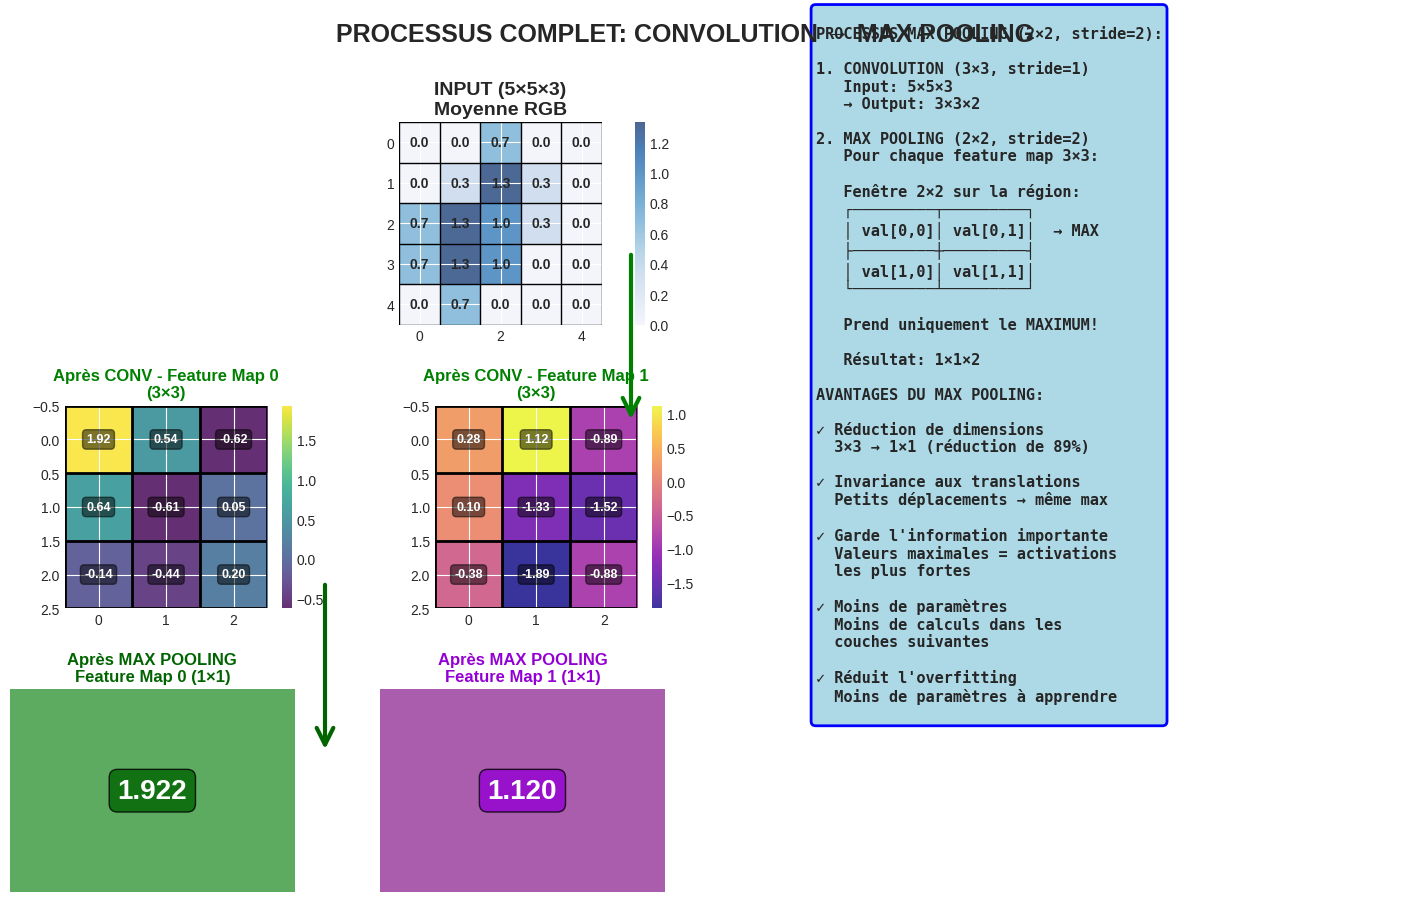

In [18]:
print("\n" + "="*70)
print("VISUALISATION: EFFET DU MAX POOLING")
print("="*70)

output_conv = output_after_conv[0]  # Retirer dimension batch
output_pool = output_pooled[0]

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 4, hspace=0.4, wspace=0.3)

fig.suptitle('PROCESSUS COMPLET: CONVOLUTION → MAX POOLING',
             fontsize=18, fontweight='bold')

# INPUT
ax_input = fig.add_subplot(gs[0, 0:2])
input_2d = input_volume.mean(axis=2)
im = ax_input.imshow(input_2d, cmap='Blues', alpha=0.7)

for i in range(5):
    for j in range(5):
        ax_input.text(j, i, f'{input_2d[i, j]:.1f}',
                     ha='center', va='center', fontsize=10, fontweight='bold')

for i in range(6):
    ax_input.axhline(i-0.5, color='black', linewidth=1)
    ax_input.axvline(i-0.5, color='black', linewidth=1)

ax_input.set_title('INPUT (5×5×3)\nMoyenne RGB', fontsize=14, fontweight='bold')
ax_input.set_xlim(-0.5, 4.5)
ax_input.set_ylim(4.5, -0.5)
plt.colorbar(im, ax=ax_input, fraction=0.046)

# APRÈS CONVOLUTION - Filtre 0
ax_conv0 = fig.add_subplot(gs[1, 0])
im0 = ax_conv0.imshow(output_conv[:, :, 0], cmap='viridis', alpha=0.8)

for i in range(3):
    for j in range(3):
        ax_conv0.text(j, i, f'{output_conv[i, j, 0]:.2f}',
                     ha='center', va='center', fontsize=9,
                     fontweight='bold', color='white',
                     bbox=dict(boxstyle='round', facecolor='black', alpha=0.5))

for i in range(4):
    ax_conv0.axhline(i-0.5, color='black', linewidth=2)
    ax_conv0.axvline(i-0.5, color='black', linewidth=2)

ax_conv0.set_title('Après CONV - Feature Map 0\n(3×3)',
                   fontsize=12, fontweight='bold', color='green')
ax_conv0.set_xlim(-0.5, 2.5)
ax_conv0.set_ylim(2.5, -0.5)
plt.colorbar(im0, ax=ax_conv0, fraction=0.046)

# APRÈS CONVOLUTION - Filtre 1
ax_conv1 = fig.add_subplot(gs[1, 1])
im1 = ax_conv1.imshow(output_conv[:, :, 1], cmap='plasma', alpha=0.8)

for i in range(3):
    for j in range(3):
        ax_conv1.text(j, i, f'{output_conv[i, j, 1]:.2f}',
                     ha='center', va='center', fontsize=9,
                     fontweight='bold', color='white',
                     bbox=dict(boxstyle='round', facecolor='black', alpha=0.5))

for i in range(4):
    ax_conv1.axhline(i-0.5, color='black', linewidth=2)
    ax_conv1.axvline(i-0.5, color='black', linewidth=2)

ax_conv1.set_title('Après CONV - Feature Map 1\n(3×3)',
                   fontsize=12, fontweight='bold', color='green')
ax_conv1.set_xlim(-0.5, 2.5)
ax_conv1.set_ylim(2.5, -0.5)
plt.colorbar(im1, ax=ax_conv1, fraction=0.046)

# APRÈS MAX POOLING - Filtre 0
ax_pool0 = fig.add_subplot(gs[2, 0])
# Pour 1×1, afficher comme un carré avec la valeur
pool_val_0 = output_pool[0, 0, 0]
ax_pool0.add_patch(plt.Rectangle((0, 0), 1, 1, facecolor='green', alpha=0.6))
ax_pool0.text(0.5, 0.5, f'{pool_val_0:.3f}',
             ha='center', va='center', fontsize=20,
             fontweight='bold', color='white',
             bbox=dict(boxstyle='round', facecolor='darkgreen', alpha=0.8))
ax_pool0.set_xlim(0, 1)
ax_pool0.set_ylim(0, 1)
ax_pool0.set_title('Après MAX POOLING\nFeature Map 0 (1×1)',
                   fontsize=12, fontweight='bold', color='darkgreen')
ax_pool0.set_xticks([])
ax_pool0.set_yticks([])

# APRÈS MAX POOLING - Filtre 1
ax_pool1 = fig.add_subplot(gs[2, 1])
pool_val_1 = output_pool[0, 0, 1]
ax_pool1.add_patch(plt.Rectangle((0, 0), 1, 1, facecolor='purple', alpha=0.6))
ax_pool1.text(0.5, 0.5, f'{pool_val_1:.3f}',
             ha='center', va='center', fontsize=20,
             fontweight='bold', color='white',
             bbox=dict(boxstyle='round', facecolor='darkviolet', alpha=0.8))
ax_pool1.set_xlim(0, 1)
ax_pool1.set_ylim(0, 1)
ax_pool1.set_title('Après MAX POOLING\nFeature Map 1 (1×1)',
                   fontsize=12, fontweight='bold', color='darkviolet')
ax_pool1.set_xticks([])
ax_pool1.set_yticks([])

# EXPLICATION
ax_explain = fig.add_subplot(gs[0:2, 2:])
ax_explain.axis('off')

explain_text = """
PROCESSUS MAX POOLING (2×2, stride=2):

1. CONVOLUTION (3×3, stride=1)
   Input: 5×5×3
   → Output: 3×3×2

2. MAX POOLING (2×2, stride=2)
   Pour chaque feature map 3×3:

   Fenêtre 2×2 sur la région:
   ┌─────────┬─────────┐
   │ val[0,0]│ val[0,1]│  → MAX
   ├─────────┼─────────┤
   │ val[1,0]│ val[1,1]│
   └─────────┴─────────┘

   Prend uniquement le MAXIMUM!

   Résultat: 1×1×2

AVANTAGES DU MAX POOLING:

✓ Réduction de dimensions
  3×3 → 1×1 (réduction de 89%)

✓ Invariance aux translations
  Petits déplacements → même max

✓ Garde l'information importante
  Valeurs maximales = activations
  les plus fortes

✓ Moins de paramètres
  Moins de calculs dans les
  couches suivantes

✓ Réduit l'overfitting
  Moins de paramètres à apprendre
"""

ax_explain.text(0.1, 0.5, explain_text,
               ha='left', va='center', fontsize=11,
               family='monospace', fontweight='bold',
               transform=ax_explain.transAxes,
               bbox=dict(boxstyle='round', facecolor='lightblue',
                        edgecolor='blue', linewidth=2))

# Flèches
arrow1 = FancyArrowPatch((0.47, 0.75), (0.47, 0.58),
                        transform=fig.transFigure,
                        arrowstyle='->', mutation_scale=30,
                        linewidth=3, color='green')
arrow2 = FancyArrowPatch((0.3, 0.42), (0.3, 0.25),
                        transform=fig.transFigure,
                        arrowstyle='->', mutation_scale=30,
                        linewidth=3, color='darkgreen')
fig.patches.extend([arrow1, arrow2])

plt.tight_layout()
plt.show()


VISUALISATION DÉTAILLÉE: OPÉRATION MAX POOLING


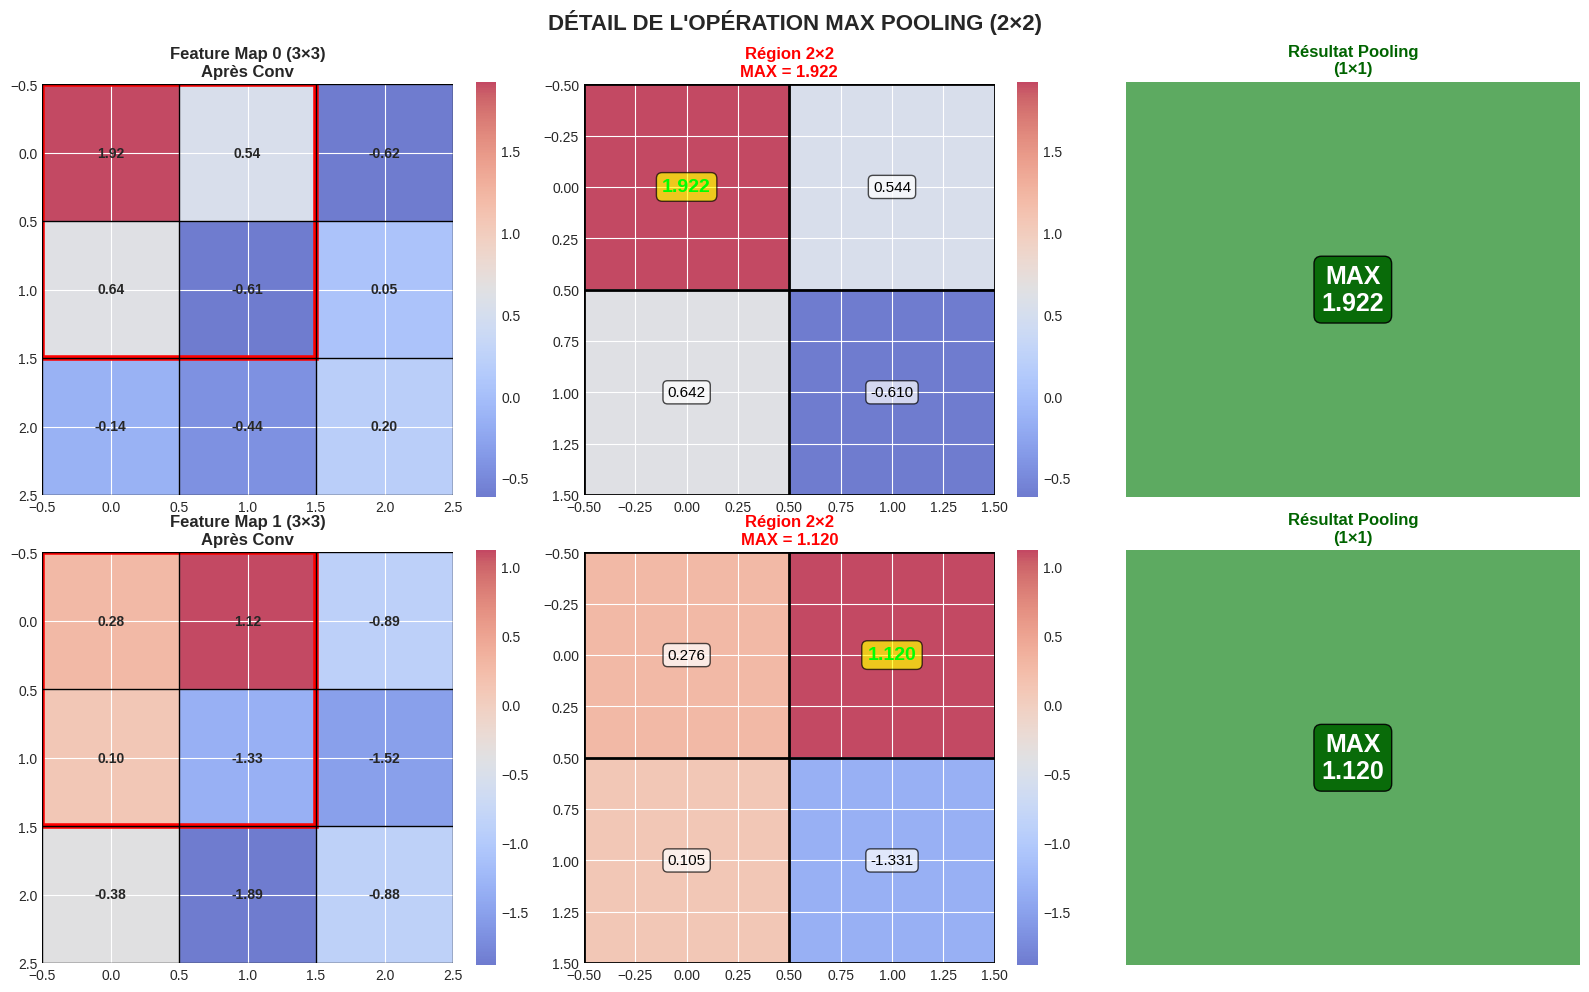

In [20]:
print("\n" + "="*70)
print("VISUALISATION DÉTAILLÉE: OPÉRATION MAX POOLING")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('DÉTAIL DE L\'OPÉRATION MAX POOLING (2×2)',
             fontsize=16, fontweight='bold')

for f in range(2):
    # Feature map après convolution
    ax1 = axes[f, 0]
    feature_map = output_conv[:, :, f]

    im = ax1.imshow(feature_map, cmap='coolwarm', alpha=0.7)

    for i in range(3):
        for j in range(3):
            ax1.text(j, i, f'{feature_map[i, j]:.2f}',
                    ha='center', va='center', fontsize=10, fontweight='bold')

    # Dessiner la fenêtre de pooling 2×2
    from matplotlib.patches import Rectangle
    rect = Rectangle((-0.5, -0.5), 2, 2,
                    linewidth=4, edgecolor='red', facecolor='none')
    ax1.add_patch(rect)

    for i in range(4):
        ax1.axhline(i-0.5, color='black', linewidth=1)
        ax1.axvline(i-0.5, color='black', linewidth=1)

    ax1.set_xlim(-0.5, 2.5)
    ax1.set_ylim(2.5, -0.5)
    ax1.set_title(f'Feature Map {f} (3×3)\nAprès Conv',
                  fontsize=12, fontweight='bold')
    plt.colorbar(im, ax=ax1, fraction=0.046)

    # Région de pooling agrandie
    ax2 = axes[f, 1]
    pooling_region = feature_map[0:2, 0:2]

    im2 = ax2.imshow(pooling_region, cmap='coolwarm', alpha=0.7,
                    vmin=feature_map.min(), vmax=feature_map.max())

    max_val = pooling_region.max()
    max_pos = np.unravel_index(pooling_region.argmax(), pooling_region.shape)

    for i in range(2):
        for j in range(2):
            val = pooling_region[i, j]
            color = 'lime' if (i, j) == max_pos else 'black'
            weight = 'bold' if (i, j) == max_pos else 'normal'
            size = 14 if (i, j) == max_pos else 11

            ax2.text(j, i, f'{val:.3f}',
                    ha='center', va='center', fontsize=size,
                    fontweight=weight, color=color,
                    bbox=dict(boxstyle='round',
                             facecolor='yellow' if (i, j) == max_pos else 'white',
                             alpha=0.7))

    for i in range(3):
        ax2.axhline(i-0.5, color='black', linewidth=2)
        ax2.axvline(i-0.5, color='black', linewidth=2)

    ax2.set_xlim(-0.5, 1.5)
    ax2.set_ylim(1.5, -0.5)
    ax2.set_title(f'Région 2×2\nMAX = {max_val:.3f}',
                  fontsize=12, fontweight='bold', color='red')
    plt.colorbar(im2, ax=ax2, fraction=0.046)

    # Résultat du pooling
    ax3 = axes[f, 2]
    ax3.add_patch(plt.Rectangle((0, 0), 1, 1,
                               facecolor='green', alpha=0.6))
    ax3.text(0.5, 0.5, f'MAX\n{max_val:.3f}',
            ha='center', va='center', fontsize=18,
            fontweight='bold', color='white',
            bbox=dict(boxstyle='round', facecolor='darkgreen', alpha=0.9))
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)
    ax3.set_title(f'Résultat Pooling\n(1×1)',
                  fontsize=12, fontweight='bold', color='darkgreen')
    ax3.set_xticks([])
    ax3.set_yticks([])

    # Ajouter annotations
    ax1.annotate('', xy=(2.8, 1), xytext=(3.2, 1),
                arrowprops=dict(arrowstyle='->', lw=3, color='red'))

plt.tight_layout()
plt.show()

In [21]:
print("\n" + "="*70)
print("ÉTAPE 13: AJOUT DU FLATTENING ET COUCHES DENSES")
print("="*70)

# Modèle complet: Conv → Pool → Flatten → Dense
model_complete = keras.Sequential([
    # Couche de convolution
    layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1),
                  padding='valid', activation='relu', input_shape=(5, 5, 3)),

    # Max Pooling
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Flattening - convertit la sortie 3D en vecteur 1D
    layers.Flatten(),

    # Couche dense (fully connected)
    layers.Dense(16, activation='relu'),

    # Couche de sortie (exemple: 10 classes)
    layers.Dense(10, activation='softmax')
])

print("\n" + "-"*70)
print("ARCHITECTURE COMPLÈTE CNN")
print("-"*70)
model_complete.summary()

print("""
EXPLICATION DES COUCHES:

1. Conv2D: Extraction de caractéristiques spatiales
   - 8 filtres 3×3 avec ReLU
   - Détecte des motifs dans l'image

2. MaxPooling2D: Réduction de dimensions
   - Fenêtre 2×2, stride=2
   - Réduit la taille spatiale de 50%

3. Flatten: Mise à plat
   - Convertit tensor 3D → vecteur 1D
   - Ex: (1, 1, 8) → (8,)
   - Nécessaire avant les couches Dense

4. Dense (16 neurones): Couche cachée
   - Apprentissage de combinaisons de features
   - ReLU pour non-linéarité

5. Dense (10 neurones): Couche de sortie
   - Softmax pour probabilités de classes
   - 10 classes = 10 sorties
""")


ÉTAPE 13: AJOUT DU FLATTENING ET COUCHES DENSES

----------------------------------------------------------------------
ARCHITECTURE COMPLÈTE CNN
----------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 3, 3, 8)        │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 1, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 538 (2.10 KB)

 Trainable params: 538 (2.10 KB)

 Non-trainable params: 0 (0.00 B)


EXPLICATION DES COUCHES:

1. Conv2D: Extraction de caractéristiques spatiales
   - 8 filtres 3×3 avec ReLU
   - Détecte des motifs dans l'image
   
2. MaxPooling2D: Réduction de dimensions
   - Fenêtre 2×2, stride=2
   - Réduit la taille spatiale de 50%
   
3. Flatten: Mise à plat
   - Convertit tensor 3D → vecteur 1D
   - Ex: (1, 1, 8) → (8,)
   - Nécessaire avant les couches Dense
   
4. Dense (16 neurones): Couche cachée
   - Apprentissage de combinaisons de features
   - ReLU pour non-linéarité
   
5. Dense (10 neurones): Couche de sortie
   - Softmax pour probabilités de classes
   - 10 classes = 10 sorties



In [22]:
print("\n" + "="*70)
print("ÉTAPE 14: CHARGEMENT DES DATASETS MNIST ET FASHION-MNIST")
print("="*70)

# Charger MNIST (chiffres manuscrits)
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

# Charger Fashion-MNIST (vêtements)
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = keras.datasets.fashion_mnist.load_data()

print(f"\n📊 MNIST Dataset:")
print(f"   Train: {X_train_mnist.shape} - Test: {X_test_mnist.shape}")
print(f"   Classes: 0-9 (chiffres)")

print(f"\n👕 Fashion-MNIST Dataset:")
print(f"   Train: {X_train_fashion.shape} - Test: {X_test_fashion.shape}")
print(f"   Classes: 0-9 (vêtements)")

# Labels Fashion-MNIST
fashion_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



ÉTAPE 14: CHARGEMENT DES DATASETS MNIST ET FASHION-MNIST
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

📊 MNIST Dataset:
   Train: (60000, 28, 28) - Test: (10000, 28, 28)
   Classes: 0-9 (chiffres)

👕 Fashion-MNIST Dataset:
   Train: (60000, 28, 28) - Test: (10000, 28, 28)
   Classes: 0-9 (vêtements)



ÉTAPE 15: VISUALISATION DES DATASETS


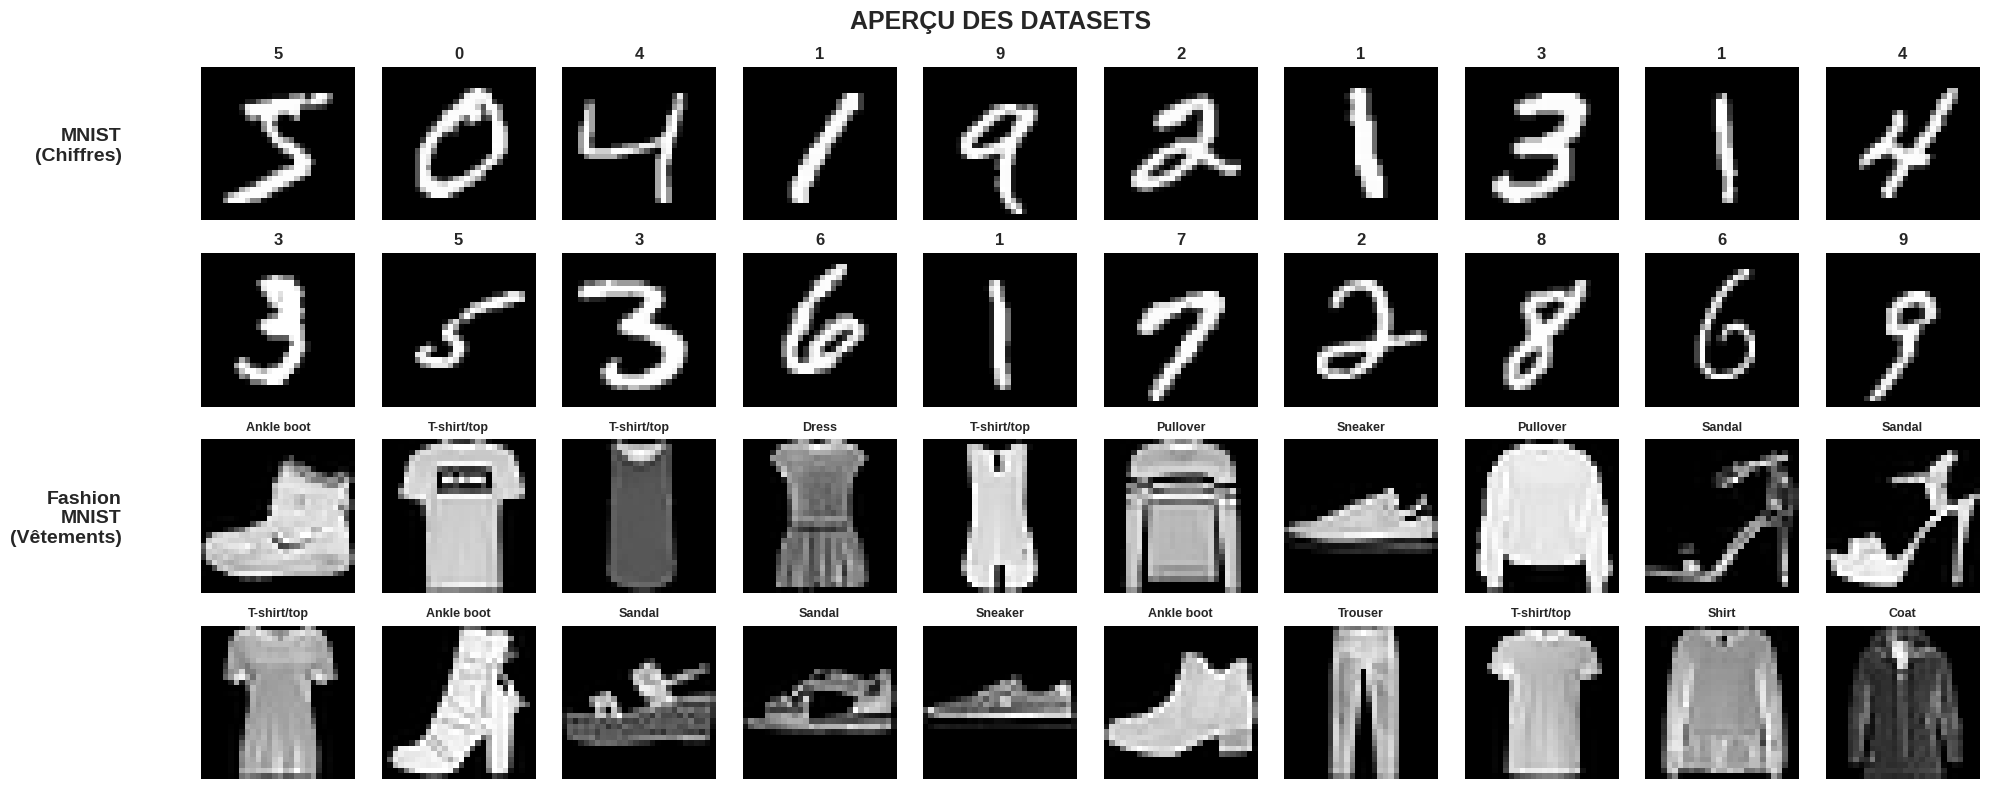

In [23]:

print("\n" + "="*70)
print("ÉTAPE 15: VISUALISATION DES DATASETS")
print("="*70)

fig, axes = plt.subplots(4, 10, figsize=(20, 8))
fig.suptitle('APERÇU DES DATASETS', fontsize=18, fontweight='bold')

# MNIST - 2 premières lignes
for i in range(10):
    # Ligne 1
    axes[0, i].imshow(X_train_mnist[i], cmap='gray')
    axes[0, i].set_title(f'{y_train_mnist[i]}', fontsize=12, fontweight='bold')
    axes[0, i].axis('off')

    # Ligne 2
    axes[1, i].imshow(X_train_mnist[i+10], cmap='gray')
    axes[1, i].set_title(f'{y_train_mnist[i+10]}', fontsize=12, fontweight='bold')
    axes[1, i].axis('off')

# Fashion-MNIST - 2 dernières lignes
for i in range(10):
    # Ligne 3
    axes[2, i].imshow(X_train_fashion[i], cmap='gray')
    axes[2, i].set_title(f'{fashion_labels[y_train_fashion[i]]}',
                        fontsize=9, fontweight='bold')
    axes[2, i].axis('off')

    # Ligne 4
    axes[3, i].imshow(X_train_fashion[i+10], cmap='gray')
    axes[3, i].set_title(f'{fashion_labels[y_train_fashion[i+10]]}',
                        fontsize=9, fontweight='bold')
    axes[3, i].axis('off')

# Ajouter des labels pour les sections
axes[0, 0].text(-15, 14, 'MNIST\n(Chiffres)', fontsize=14,
               fontweight='bold', va='center', ha='right', rotation=0)
axes[2, 0].text(-15, 14, 'Fashion\nMNIST\n(Vêtements)', fontsize=14,
               fontweight='bold', va='center', ha='right', rotation=0)

plt.tight_layout()
plt.show()

In [24]:
print("\n" + "="*70)
print("ÉTAPE 16: PRÉTRAITEMENT DES DONNÉES")
print("="*70)

def preprocess_data(X_train, X_test, y_train, y_test):
    """Prétraite les données pour le CNN"""
    # Normalisation [0, 255] → [0, 1]
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Ajouter dimension du canal (28, 28) → (28, 28, 1)
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    # One-hot encoding pour les labels
    y_train_cat = keras.utils.to_categorical(y_train, 10)
    y_test_cat = keras.utils.to_categorical(y_test, 10)

    return X_train, X_test, y_train_cat, y_test_cat

# Prétraiter MNIST
X_train_m, X_test_m, y_train_m, y_test_m = preprocess_data(
    X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist)

# Prétraiter Fashion-MNIST
X_train_f, X_test_f, y_train_f, y_test_f = preprocess_data(
    X_train_fashion, X_test_fashion, y_train_fashion, y_test_fashion)

print(f"\n✅ Prétraitement terminé:")
print(f"   MNIST Train: {X_train_m.shape}")
print(f"   MNIST Test: {X_test_m.shape}")
print(f"   Fashion Train: {X_train_f.shape}")
print(f"   Fashion Test: {X_test_f.shape}")


ÉTAPE 16: PRÉTRAITEMENT DES DONNÉES

✅ Prétraitement terminé:
   MNIST Train: (60000, 28, 28, 1)
   MNIST Test: (10000, 28, 28, 1)
   Fashion Train: (60000, 28, 28, 1)
   Fashion Test: (10000, 28, 28, 1)


In [25]:
print("\n" + "="*70)
print("ÉTAPE 17: DÉFINITION DES ARCHITECTURES CNN")
print("="*70)

def create_cnn_architecture(name, filters_list, kernel_sizes, pool_after,
                           dense_units, dropout_rate=0.0):
    """Crée une architecture CNN configurable"""

    model = keras.Sequential(name=name)
    model.add(layers.Input(shape=(28, 28, 1)))

    # Couches de convolution
    for i, (filters, kernel, pool) in enumerate(zip(filters_list, kernel_sizes, pool_after)):
        model.add(layers.Conv2D(filters=filters,
                               kernel_size=kernel,
                               padding='same',
                               activation='relu',
                               name=f'conv_{i+1}'))

        if pool:
            model.add(layers.MaxPooling2D(pool_size=(2, 2), name=f'pool_{i+1}'))

        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate, name=f'dropout_{i+1}'))

    # Flatten
    model.add(layers.Flatten(name='flatten'))

    # Couches denses
    for i, units in enumerate(dense_units):
        model.add(layers.Dense(units, activation='relu', name=f'dense_{i+1}'))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate, name=f'dense_dropout_{i+1}'))

    # Couche de sortie
    model.add(layers.Dense(10, activation='softmax', name='output'))

    return model

# Définir 5 architectures de complexité croissante
architectures = {
    'CNN_Simple': {
        'filters': [16],
        'kernels': [(3, 3)],
        'pool': [True],
        'dense': [32],
        'dropout': 0.0,
        'description': '1 Conv (16) → Pool → Dense(32)'
    },
    'CNN_2Conv': {
        'filters': [16, 32],
        'kernels': [(3, 3), (3, 3)],
        'pool': [False, True],
        'dense': [64],
        'dropout': 0.0,
        'description': '2 Conv (16→32) → Pool → Dense(64)'
    },
    'CNN_2Conv_Dropout': {
        'filters': [32, 32],
        'kernels': [(3, 3), (3, 3)],
        'pool': [True, True],
        'dense': [64],
        'dropout': 0.25,
        'description': '2 Conv (32→32) → 2 Pools → Dropout → Dense(64)'
    },
    'CNN_Deep': {
        'filters': [32, 64],
        'kernels': [(3, 3), (3, 3)],
        'pool': [True, True],
        'dense': [128, 64],
        'dropout': 0.3,
        'description': '2 Conv (32→64) → 2 Pools → 2 Dense(128→64) + Dropout'
    },
    'CNN_VeryDeep': {
        'filters': [32, 64, 64],
        'kernels': [(3, 3), (3, 3), (3, 3)],
        'pool': [True, True, False],
        'dense': [128],
        'dropout': 0.4,
        'description': '3 Conv (32→64→64) → 2 Pools → Dense(128) + Dropout'
    }
}

print("\n ARCHITECTURES DÉFINIES:\n")
for i, (name, config) in enumerate(architectures.items(), 1):
    print(f"{i}. {name}")
    print(f"   {config['description']}")
    print()



ÉTAPE 17: DÉFINITION DES ARCHITECTURES CNN

📐 ARCHITECTURES DÉFINIES:

1. CNN_Simple
   1 Conv (16) → Pool → Dense(32)

2. CNN_2Conv
   2 Conv (16→32) → Pool → Dense(64)

3. CNN_2Conv_Dropout
   2 Conv (32→32) → 2 Pools → Dropout → Dense(64)

4. CNN_Deep
   2 Conv (32→64) → 2 Pools → 2 Dense(128→64) + Dropout

5. CNN_VeryDeep
   3 Conv (32→64→64) → 2 Pools → Dense(128) + Dropout



In [27]:
print("\n" + "="*70)
print("ÉTAPE 18: FONCTION D'ENTRAÎNEMENT")
print("="*70)

def train_and_evaluate(model, X_train, y_train, X_test, y_test,
                      epochs=10, batch_size=128, dataset_name=''):
    """Entraîne et évalue un modèle CNN"""

    print(f"\n🚀 Entraînement: {model.name} sur {dataset_name}")
    print("-" * 60)

    # Compiler le modèle
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callback pour early stopping
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=0
    )

    # Entraînement
    start_time = time.time()

    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.15,
        callbacks=[early_stop],
        verbose=0
    )

    training_time = time.time() - start_time

    # Évaluation
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    # Nombre de paramètres
    total_params = model.count_params()

    results = {
        'history': history.history,
        'test_acc': test_acc,
        'test_loss': test_loss,
        'training_time': training_time,
        'total_params': total_params,
        'epochs_trained': len(history.history['loss'])
    }

    print(f"✅ Terminé en {training_time:.1f}s")
    print(f"   Accuracy test: {test_acc*100:.2f}%")
    print(f"   Loss test: {test_loss:.4f}")
    print(f"   Paramètres: {total_params:,}")

    return results


ÉTAPE 18: FONCTION D'ENTRAÎNEMENT


In [44]:
print("\n" + "="*70)
print("ÉTAPE 19: ENTRAÎNEMENT SUR MNIST ET FASHION-MNIST")
print("="*70)

import time

# Paramètres d'entraînement
EPOCHS = 15
BATCH_SIZE = 128

# Stocker les résultats
results_mnist = {}
results_fashion = {}

print("\n" + "="*70)
print("DÉBUT DE L'ENTRAÎNEMENT - PHASE 1: MNIST")
print("="*70)

# Entraîner sur MNIST
for arch_name, config in architectures.items():
    model = create_cnn_architecture(
        name=arch_name,
        filters_list=config['filters'],
        kernel_sizes=config['kernels'],
        pool_after=config['pool'],
        dense_units=config['dense'],
        dropout_rate=config['dropout']
    )

    results_mnist[arch_name] = train_and_evaluate(
        model, X_train_m, y_train_m, X_test_m, y_test_m,
        epochs=EPOCHS, batch_size=BATCH_SIZE, dataset_name='MNIST'
    )

print("\n" + "="*70)
print("DÉBUT DE L'ENTRAÎNEMENT - PHASE 2: FASHION-MNIST")
print("="*70)

# Entraîner sur Fashion-MNIST
for arch_name, config in architectures.items():
    model = create_cnn_architecture(
        name=arch_name,
        filters_list=config['filters'],
        kernel_sizes=config['kernels'],
        pool_after=config['pool'],
        dense_units=config['dense'],
        dropout_rate=config['dropout']
    )

    results_fashion[arch_name] = train_and_evaluate(
        model, X_train_f, y_train_f, X_test_f, y_test_f,
        epochs=EPOCHS, batch_size=BATCH_SIZE, dataset_name='Fashion-MNIST'
    )

print("\n" + "="*70)
print("✅ TOUS LES ENTRAÎNEMENTS TERMINÉS!")
print("="*70)


ÉTAPE 19: ENTRAÎNEMENT SUR MNIST ET FASHION-MNIST

DÉBUT DE L'ENTRAÎNEMENT - PHASE 1: MNIST

🚀 Entraînement: CNN_Simple sur MNIST
------------------------------------------------------------
✅ Terminé en 23.4s
   Accuracy test: 98.39%
   Loss test: 0.0566
   Paramètres: 100,874

🚀 Entraînement: CNN_2Conv sur MNIST
------------------------------------------------------------
✅ Terminé en 18.0s
   Accuracy test: 98.77%
   Loss test: 0.0408
   Paramètres: 406,922

🚀 Entraînement: CNN_2Conv_Dropout sur MNIST
------------------------------------------------------------
✅ Terminé en 34.2s
   Accuracy test: 99.07%
   Loss test: 0.0251
   Paramètres: 110,634

🚀 Entraînement: CNN_Deep sur MNIST
------------------------------------------------------------
✅ Terminé en 30.6s
   Accuracy test: 99.08%
   Loss test: 0.0266
   Paramètres: 429,258

🚀 Entraînement: CNN_VeryDeep sur MNIST
------------------------------------------------------------
✅ Terminé en 40.5s
   Accuracy test: 99.25%
   Loss te

In [29]:
print("\n" + "="*70)
print("ÉTAPE 20: COMPARAISON DES ARCHITECTURES")
print("="*70)

# Créer un DataFrame pour comparaison
import pandas as pd

comparison_data = []
for arch_name in architectures.keys():
    comparison_data.append({
        'Architecture': arch_name,
        'MNIST_Acc': results_mnist[arch_name]['test_acc'] * 100,
        'Fashion_Acc': results_fashion[arch_name]['test_acc'] * 100,
        'Params': results_mnist[arch_name]['total_params'],
        'Time_MNIST': results_mnist[arch_name]['training_time'],
        'Time_Fashion': results_fashion[arch_name]['training_time']
    })

df_comparison = pd.DataFrame(comparison_data)

print("\n TABLEAU COMPARATIF:")
print("="*80)
print(df_comparison.to_string(index=False))
print("="*80)

# Trouver les meilleures architectures
best_mnist = df_comparison.loc[df_comparison['MNIST_Acc'].idxmax()]
best_fashion = df_comparison.loc[df_comparison['Fashion_Acc'].idxmax()]
most_efficient = df_comparison.loc[
    (df_comparison['MNIST_Acc'] + df_comparison['Fashion_Acc']).div(df_comparison['Params']).idxmax()
]

print(f"\n MEILLEURE ACCURACY MNIST: {best_mnist['Architecture']}")
print(f"   Accuracy: {best_mnist['MNIST_Acc']:.2f}%")

print(f"\n MEILLEURE ACCURACY FASHION: {best_fashion['Architecture']}")
print(f"   Accuracy: {best_fashion['Fashion_Acc']:.2f}%")

print(f"\n PLUS EFFICIENTE: {most_efficient['Architecture']}")
print(f"   MNIST: {most_efficient['MNIST_Acc']:.2f}% | Fashion: {most_efficient['Fashion_Acc']:.2f}%")
print(f"   Paramètres: {most_efficient['Params']:,}")


ÉTAPE 20: COMPARAISON DES ARCHITECTURES

 TABLEAU COMPARATIF:
     Architecture  MNIST_Acc  Fashion_Acc  Params  Time_MNIST  Time_Fashion
       CNN_Simple  98.369998    90.189999  100874   18.333418     22.747237
        CNN_2Conv  98.699999    91.720003  406922   19.918386     24.950060
CNN_2Conv_Dropout  98.850000    91.350001  110634   37.798636     33.443381
         CNN_Deep  99.019998    91.850001  429258   35.280162     39.091157
     CNN_VeryDeep  99.320000    90.810001  458570   41.381819     44.467845

 MEILLEURE ACCURACY MNIST: CNN_VeryDeep
   Accuracy: 99.32%

 MEILLEURE ACCURACY FASHION: CNN_Deep
   Accuracy: 91.85%

 PLUS EFFICIENTE: CNN_Simple
   MNIST: 98.37% | Fashion: 90.19%
   Paramètres: 100,874



ÉTAPE 21: VISUALISATION DES COURBES D'APPRENTISSAGE


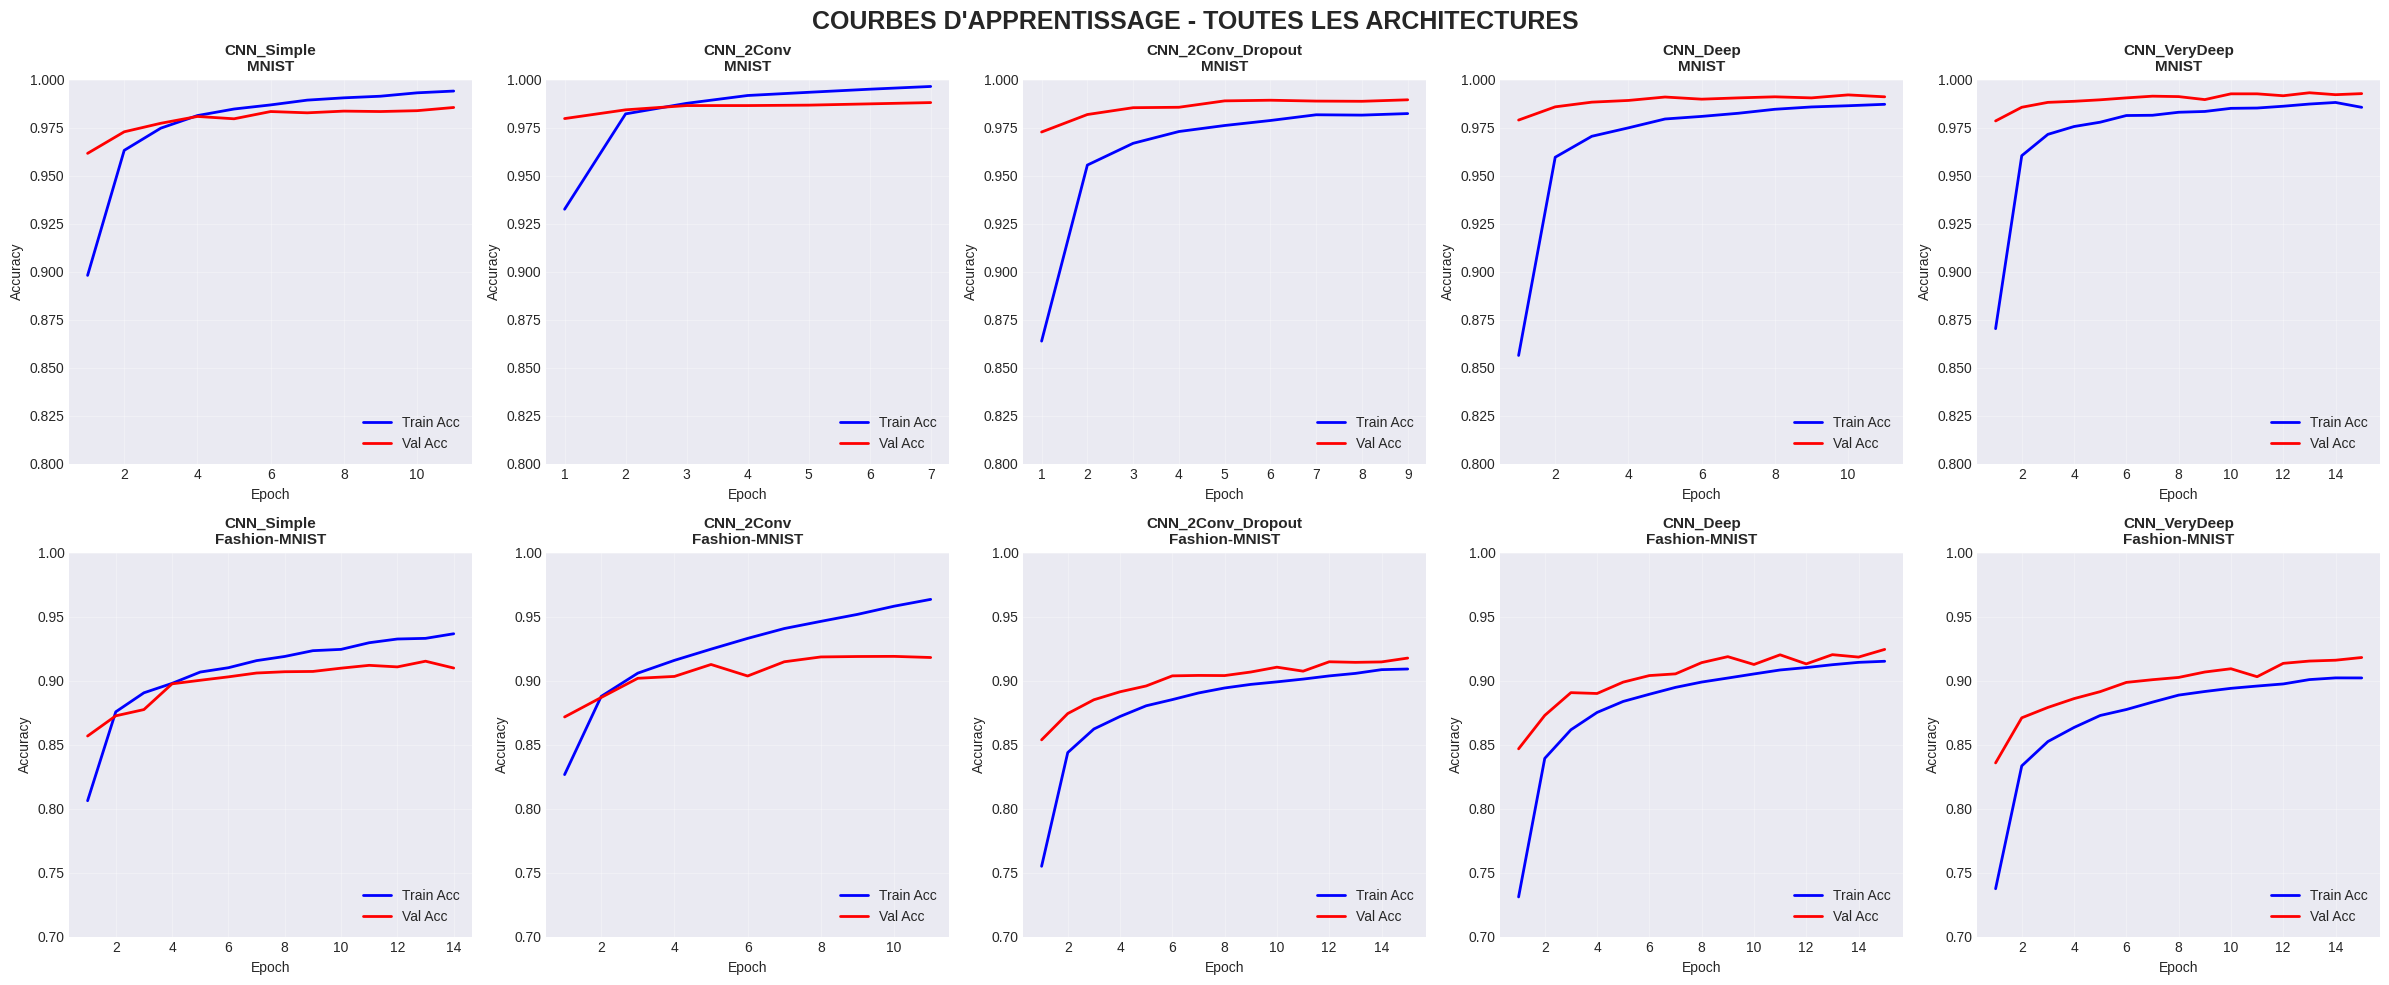

In [30]:
print("\n" + "="*70)
print("ÉTAPE 21: VISUALISATION DES COURBES D'APPRENTISSAGE")
print("="*70)

fig, axes = plt.subplots(2, 5, figsize=(24, 10))
fig.suptitle('COURBES D\'APPRENTISSAGE - TOUTES LES ARCHITECTURES',
             fontsize=18, fontweight='bold')

for idx, (arch_name, config) in enumerate(architectures.items()):
    # MNIST - Ligne 1
    ax1 = axes[0, idx]
    history_m = results_mnist[arch_name]['history']

    epochs_range = range(1, len(history_m['accuracy']) + 1)
    ax1.plot(epochs_range, history_m['accuracy'], 'b-', label='Train Acc', linewidth=2)
    ax1.plot(epochs_range, history_m['val_accuracy'], 'r-', label='Val Acc', linewidth=2)
    ax1.set_title(f'{arch_name}\nMNIST', fontsize=11, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([0.8, 1.0])

    # Fashion-MNIST - Ligne 2
    ax2 = axes[1, idx]
    history_f = results_fashion[arch_name]['history']

    epochs_range = range(1, len(history_f['accuracy']) + 1)
    ax2.plot(epochs_range, history_f['accuracy'], 'b-', label='Train Acc', linewidth=2)
    ax2.plot(epochs_range, history_f['val_accuracy'], 'r-', label='Val Acc', linewidth=2)
    ax2.set_title(f'{arch_name}\nFashion-MNIST', fontsize=11, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend(loc='lower right')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0.7, 1.0])

plt.tight_layout()
plt.show()



ÉTAPE 22: VISUALISATION DES PERTES (LOSS)


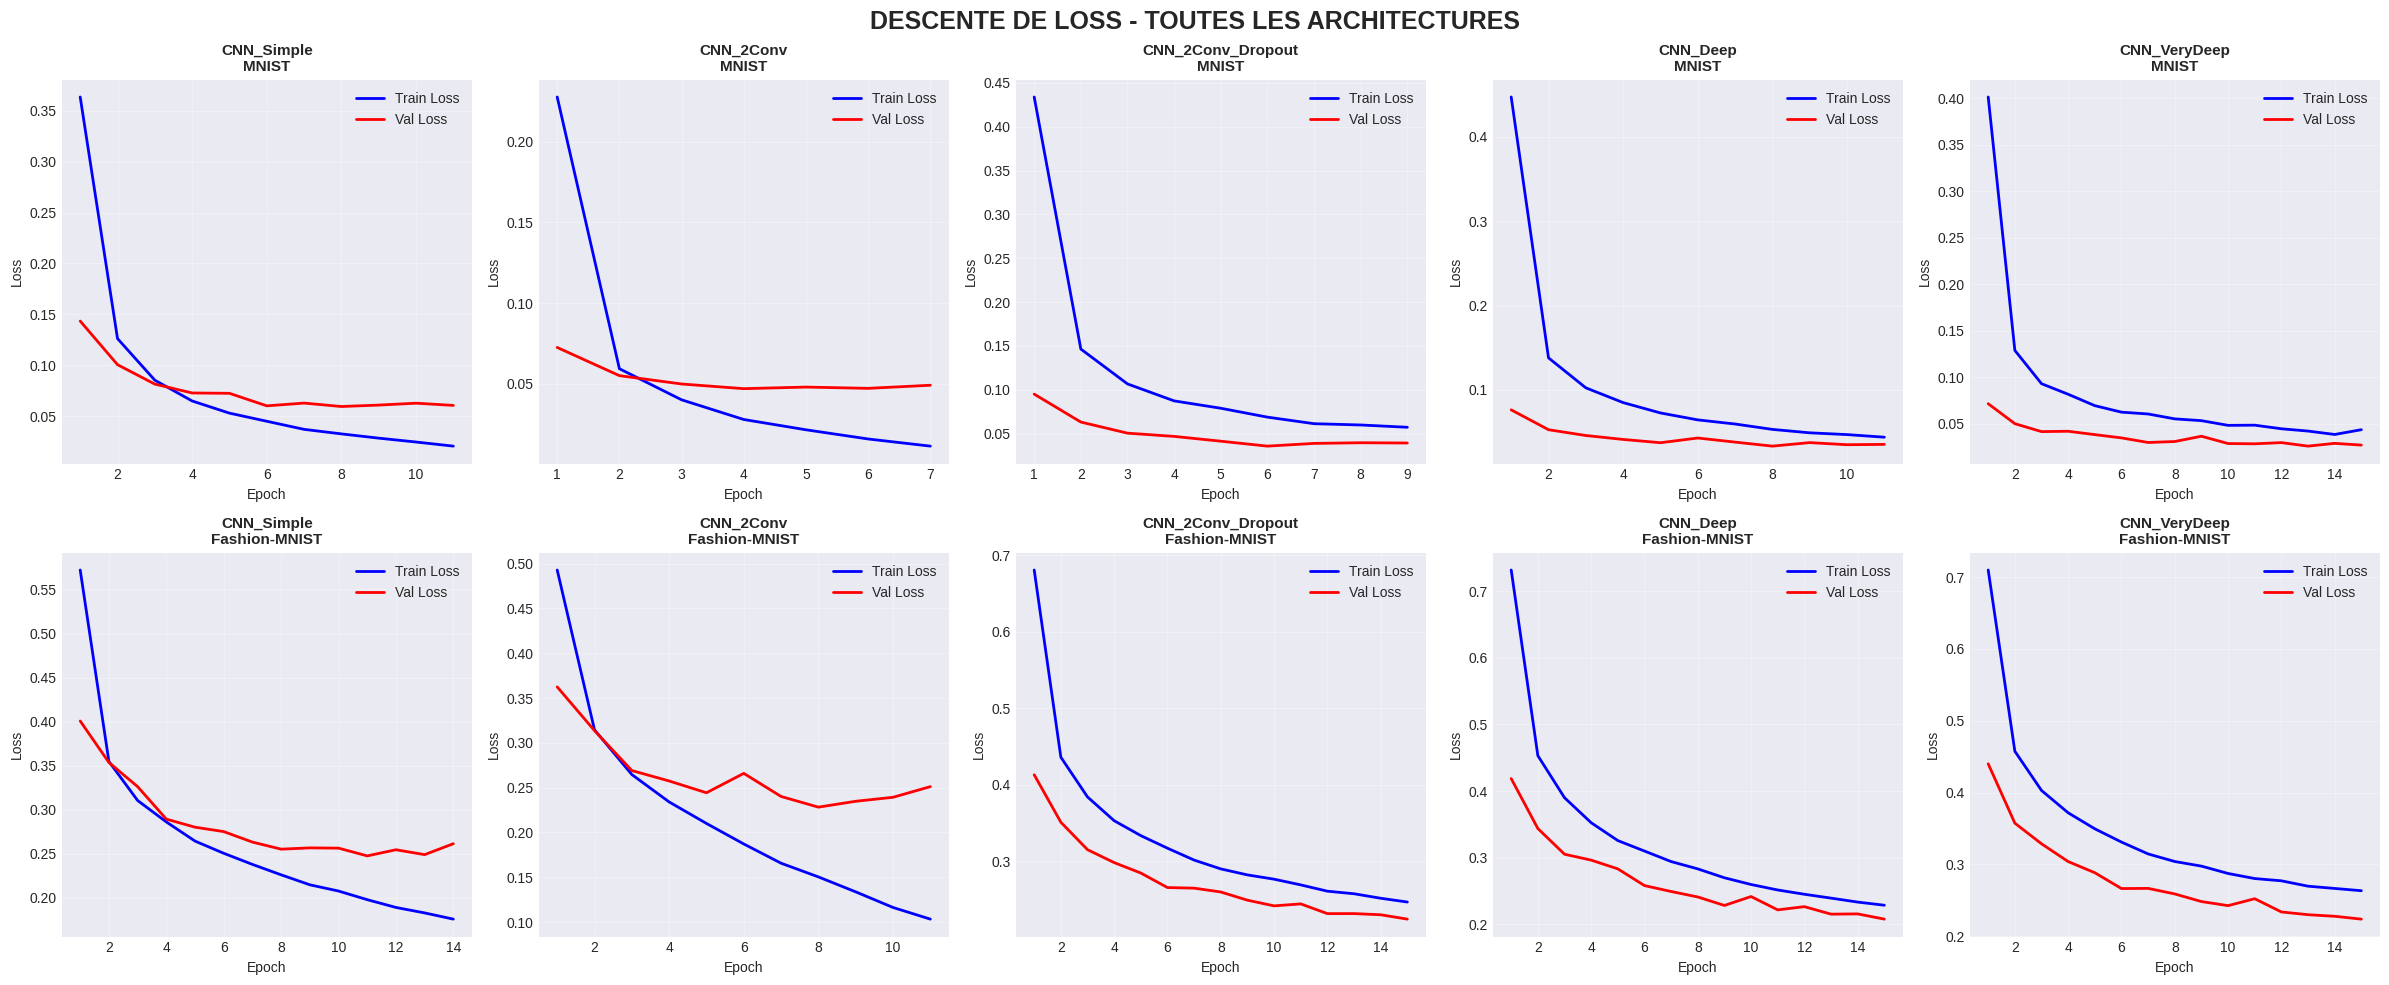

In [31]:
print("\n" + "="*70)
print("ÉTAPE 22: VISUALISATION DES PERTES (LOSS)")
print("="*70)

fig, axes = plt.subplots(2, 5, figsize=(24, 10))
fig.suptitle('DESCENTE DE LOSS - TOUTES LES ARCHITECTURES',
             fontsize=18, fontweight='bold')

for idx, (arch_name, config) in enumerate(architectures.items()):
    # MNIST - Ligne 1
    ax1 = axes[0, idx]
    history_m = results_mnist[arch_name]['history']

    epochs_range = range(1, len(history_m['loss']) + 1)
    ax1.plot(epochs_range, history_m['loss'], 'b-', label='Train Loss', linewidth=2)
    ax1.plot(epochs_range, history_m['val_loss'], 'r-', label='Val Loss', linewidth=2)
    ax1.set_title(f'{arch_name}\nMNIST', fontsize=11, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)

    # Fashion-MNIST - Ligne 2
    ax2 = axes[1, idx]
    history_f = results_fashion[arch_name]['history']

    epochs_range = range(1, len(history_f['loss']) + 1)
    ax2.plot(epochs_range, history_f['loss'], 'b-', label='Train Loss', linewidth=2)
    ax2.plot(epochs_range, history_f['val_loss'], 'r-', label='Val Loss', linewidth=2)
    ax2.set_title(f'{arch_name}\nFashion-MNIST', fontsize=11, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


ÉTAPE 23: VISUALISATION COMPARATIVE


/tmp/ipython-input-2689367586.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(architectures.keys(), rotation=45, ha='right')
/tmp/ipython-input-2689367586.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


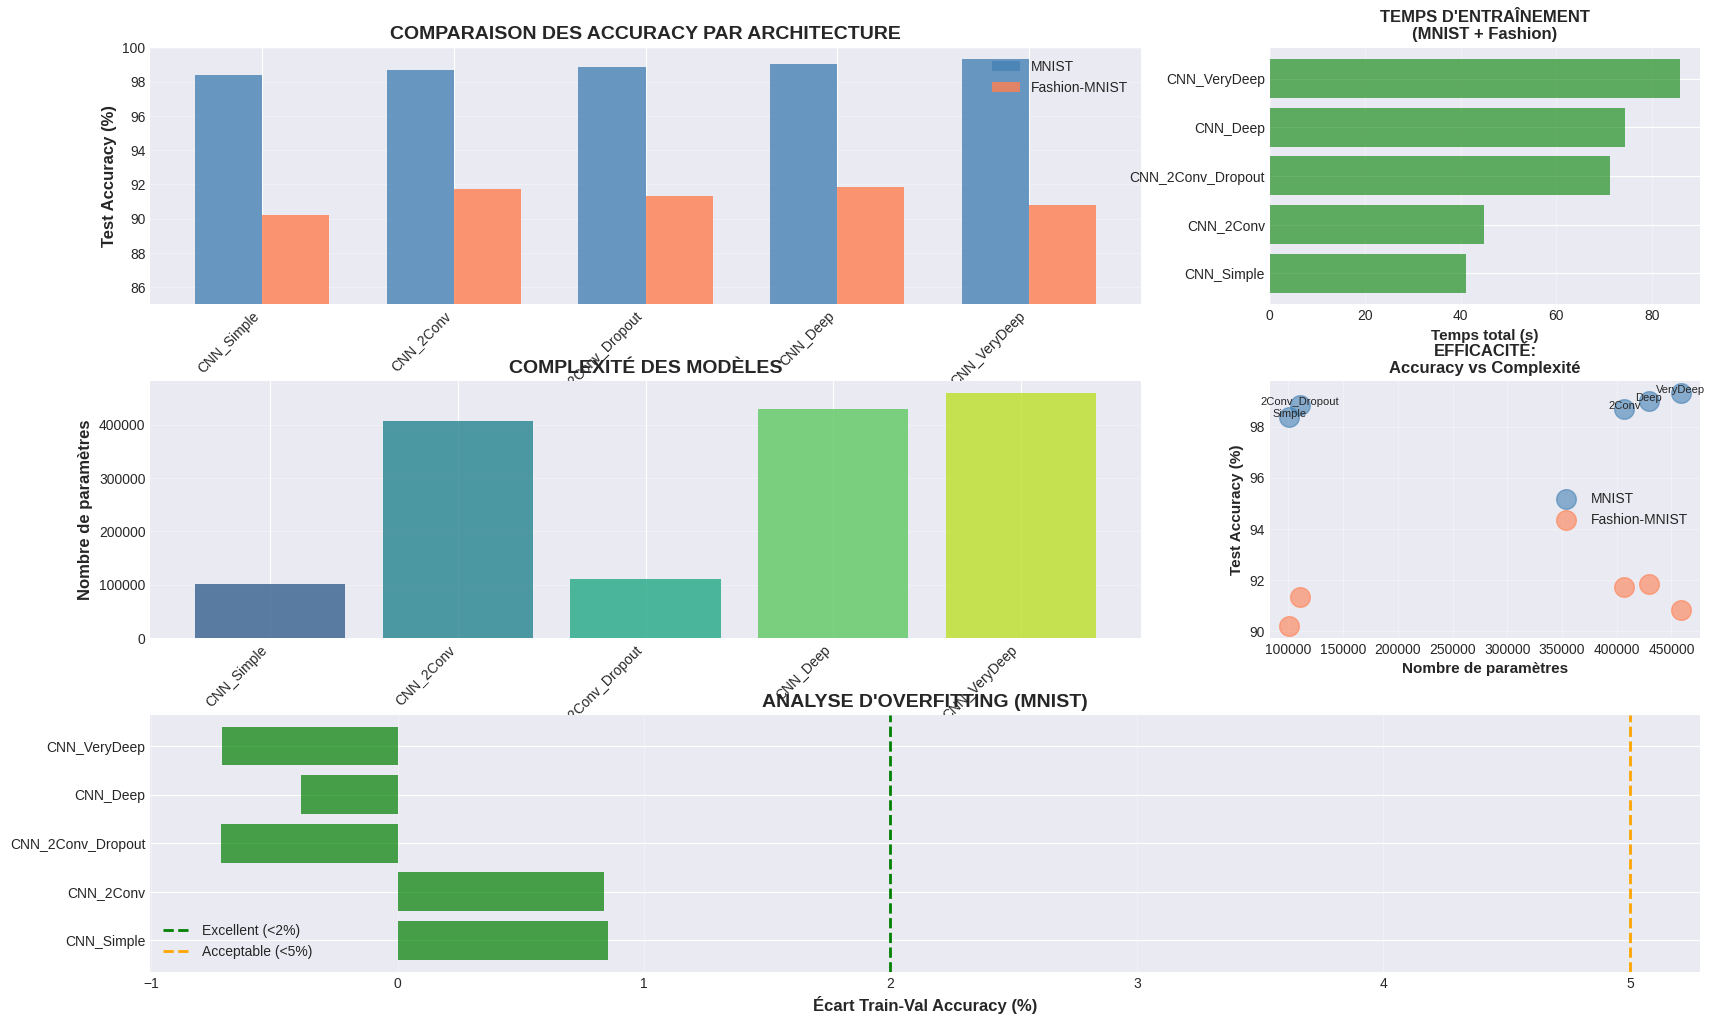

In [32]:
print("\n" + "="*70)
print("ÉTAPE 23: VISUALISATION COMPARATIVE")
print("="*70)

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Accuracy comparée
ax1 = fig.add_subplot(gs[0, :2])
x_pos = np.arange(len(architectures))
width = 0.35

mnist_accs = [results_mnist[arch]['test_acc']*100 for arch in architectures.keys()]
fashion_accs = [results_fashion[arch]['test_acc']*100 for arch in architectures.keys()]

ax1.bar(x_pos - width/2, mnist_accs, width, label='MNIST', color='steelblue', alpha=0.8)
ax1.bar(x_pos + width/2, fashion_accs, width, label='Fashion-MNIST', color='coral', alpha=0.8)

ax1.set_ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('COMPARAISON DES ACCURACY PAR ARCHITECTURE', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(architectures.keys(), rotation=45, ha='right')
ax1.legend()
ax1.grid(True, axis='y', alpha=0.3)
ax1.set_ylim([85, 100])

# 2. Temps d'entraînement
ax2 = fig.add_subplot(gs[0, 2])
times_mnist = [results_mnist[arch]['training_time'] for arch in architectures.keys()]
times_fashion = [results_fashion[arch]['training_time'] for arch in architectures.keys()]
total_times = [m + f for m, f in zip(times_mnist, times_fashion)]

ax2.barh(list(architectures.keys()), total_times, color='green', alpha=0.6)
ax2.set_xlabel('Temps total (s)', fontsize=11, fontweight='bold')
ax2.set_title('TEMPS D\'ENTRAÎNEMENT\n(MNIST + Fashion)', fontsize=12, fontweight='bold')
ax2.grid(True, axis='x', alpha=0.3)

# 3. Nombre de paramètres
ax3 = fig.add_subplot(gs[1, :2])
params = [results_mnist[arch]['total_params'] for arch in architectures.keys()]

colors_params = plt.cm.viridis(np.linspace(0.3, 0.9, len(params)))
ax3.bar(list(architectures.keys()), params, color=colors_params, alpha=0.8)
ax3.set_ylabel('Nombre de paramètres', fontsize=12, fontweight='bold')
ax3.set_title('COMPLEXITÉ DES MODÈLES', fontsize=14, fontweight='bold')
ax3.set_xticklabels(architectures.keys(), rotation=45, ha='right')
ax3.grid(True, axis='y', alpha=0.3)

# 4. Efficacité (Accuracy / Params)
ax4 = fig.add_subplot(gs[1, 2])
efficiency_mnist = [mnist_accs[i] / (params[i]/1000) for i in range(len(params))]
efficiency_fashion = [fashion_accs[i] / (params[i]/1000) for i in range(len(params))]

ax4.scatter(params, mnist_accs, s=200, alpha=0.6, label='MNIST', color='steelblue')
ax4.scatter(params, fashion_accs, s=200, alpha=0.6, label='Fashion-MNIST', color='coral')

for i, arch in enumerate(architectures.keys()):
    ax4.annotate(arch.replace('CNN_', ''), (params[i], mnist_accs[i]),
                fontsize=8, ha='center')

ax4.set_xlabel('Nombre de paramètres', fontsize=11, fontweight='bold')
ax4.set_ylabel('Test Accuracy (%)', fontsize=11, fontweight='bold')
ax4.set_title('EFFICACITÉ:\nAccuracy vs Complexité', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Overfitting analysis
ax5 = fig.add_subplot(gs[2, :])
for idx, (arch_name, config) in enumerate(architectures.items()):
    history_m = results_mnist[arch_name]['history']
    train_acc = history_m['accuracy'][-1]
    val_acc = history_m['val_accuracy'][-1]
    overfitting = (train_acc - val_acc) * 100

    color = 'green' if overfitting < 2 else ('orange' if overfitting < 5 else 'red')
    ax5.barh(idx, overfitting, color=color, alpha=0.7)

ax5.set_yticks(range(len(architectures)))
ax5.set_yticklabels(architectures.keys())
ax5.set_xlabel('Écart Train-Val Accuracy (%)', fontsize=12, fontweight='bold')
ax5.set_title('ANALYSE D\'OVERFITTING (MNIST)', fontsize=14, fontweight='bold')
ax5.axvline(x=2, color='green', linestyle='--', linewidth=2, label='Excellent (<2%)')
ax5.axvline(x=5, color='orange', linestyle='--', linewidth=2, label='Acceptable (<5%)')
ax5.legend()
ax5.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


ÉTAPE 25: VISUALISATION DES FILTRES APPRIS

Dimensions des filtres de Conv1: (3, 3, 1, 32)
  Format: (kernel_h, kernel_w, input_channels, num_filters)


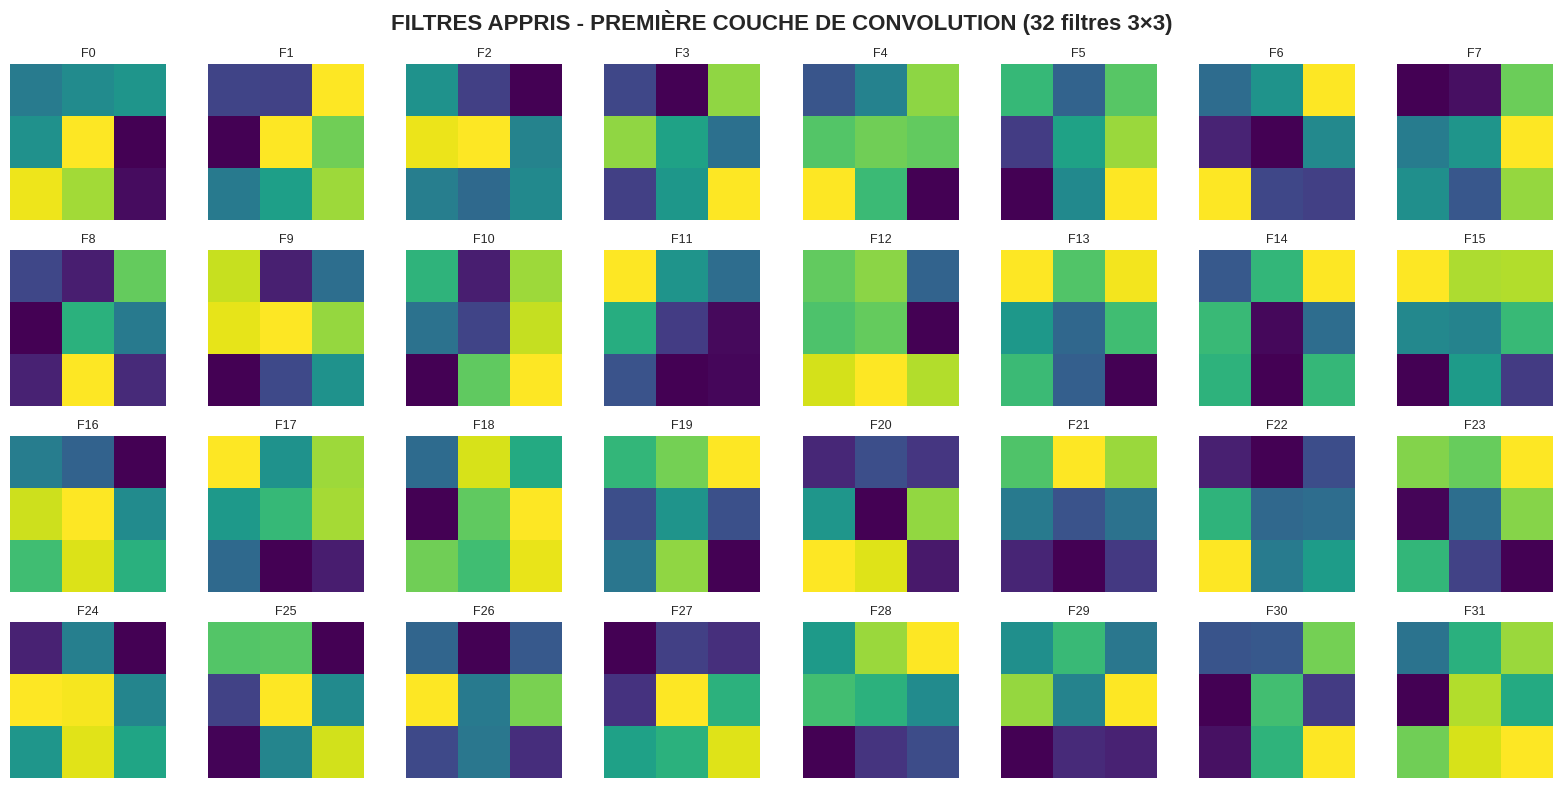

In [33]:
print("\n" + "="*70)
print("ÉTAPE 25: VISUALISATION DES FILTRES APPRIS")
print("="*70)

# Recréer et entraîner brièvement un modèle pour visualisation
model_viz = create_cnn_architecture(
    name='Visualization_Model',
    filters_list=[32, 64],
    kernel_sizes=[(3, 3), (3, 3)],
    pool_after=[True, True],
    dense_units=[128],
    dropout_rate=0.3
)

model_viz.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_viz.fit(X_train_m[:5000], y_train_m[:5000], epochs=5, batch_size=128, verbose=0)

# Extraire les poids de la première couche Conv
conv_layer = model_viz.layers[0]
filters, biases = conv_layer.get_weights()

print(f"\nDimensions des filtres de Conv1: {filters.shape}")
print(f"  Format: (kernel_h, kernel_w, input_channels, num_filters)")

# Visualiser les 32 premiers filtres (8×4 grid)
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('FILTRES APPRIS - PREMIÈRE COUCHE DE CONVOLUTION (32 filtres 3×3)',
             fontsize=16, fontweight='bold')

for i in range(32):
    ax = axes[i // 8, i % 8]

    # Normaliser le filtre pour visualisation
    f = filters[:, :, 0, i]
    f_norm = (f - f.min()) / (f.max() - f.min() + 1e-8)

    ax.imshow(f_norm, cmap='viridis', interpolation='nearest')
    ax.set_title(f'F{i}', fontsize=9)
    ax.axis('off')

plt.tight_layout()
plt.show()



ÉTAPE 26: VISUALISATION DES FEATURE MAPS POUR UNE IMAGE


/tmp/ipython-input-2219951046.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


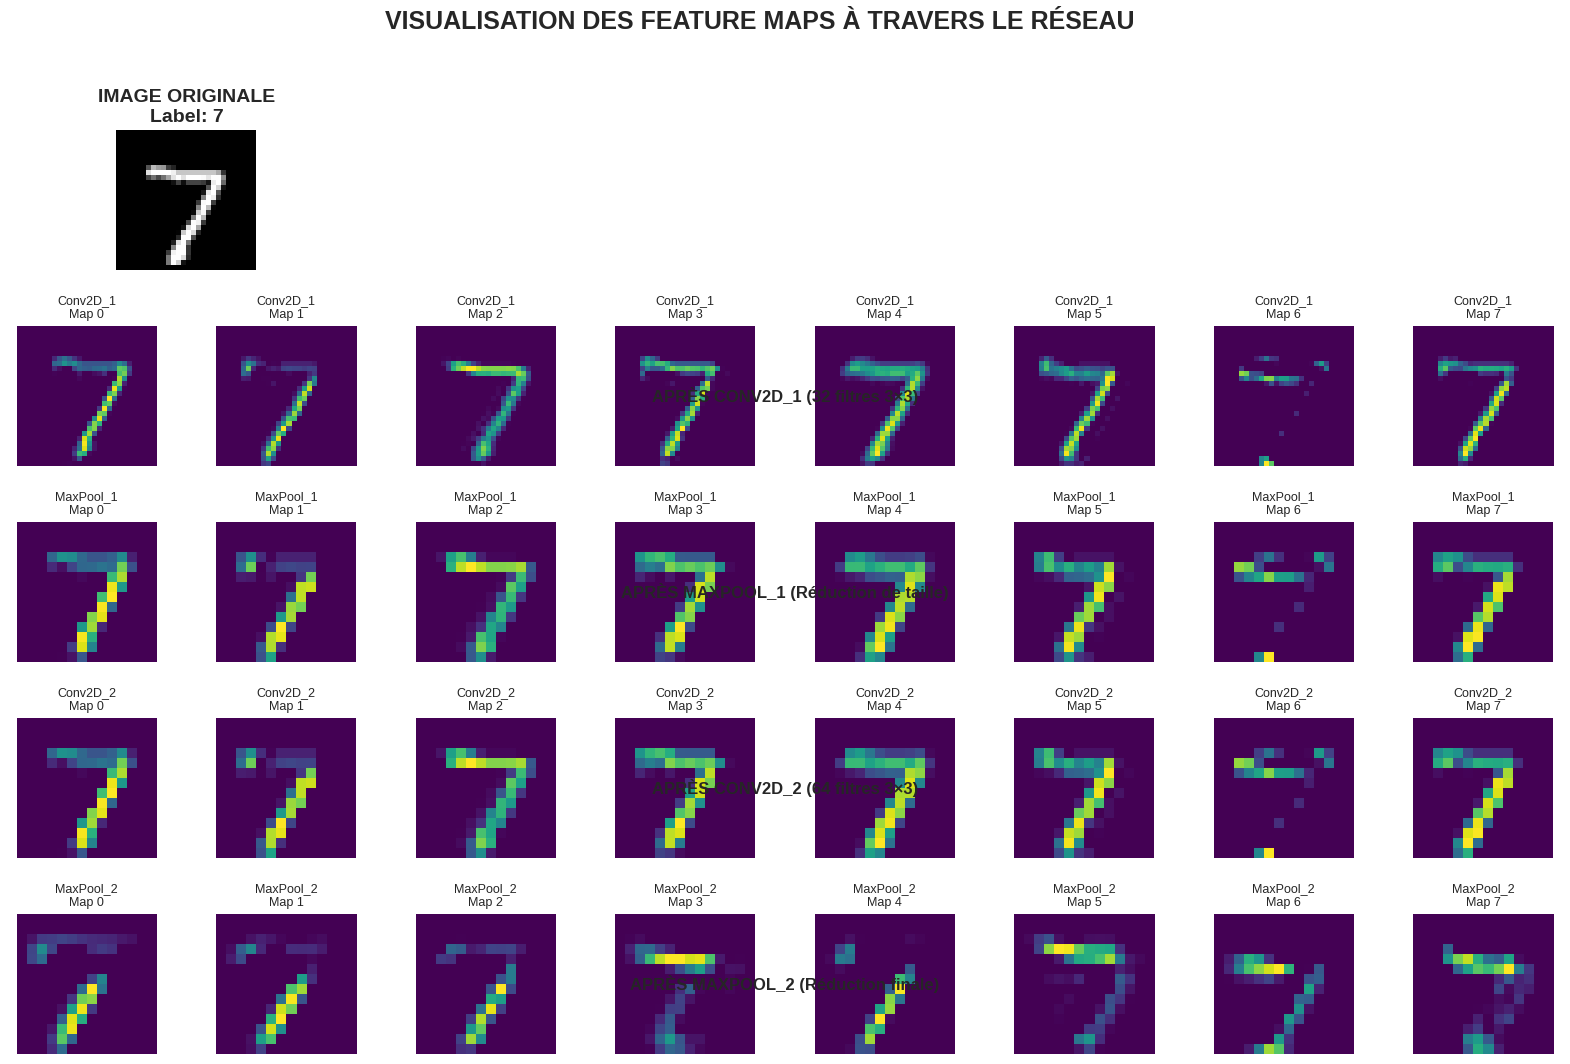


ÉTAPE 27: MATRICES DE CONFUSION


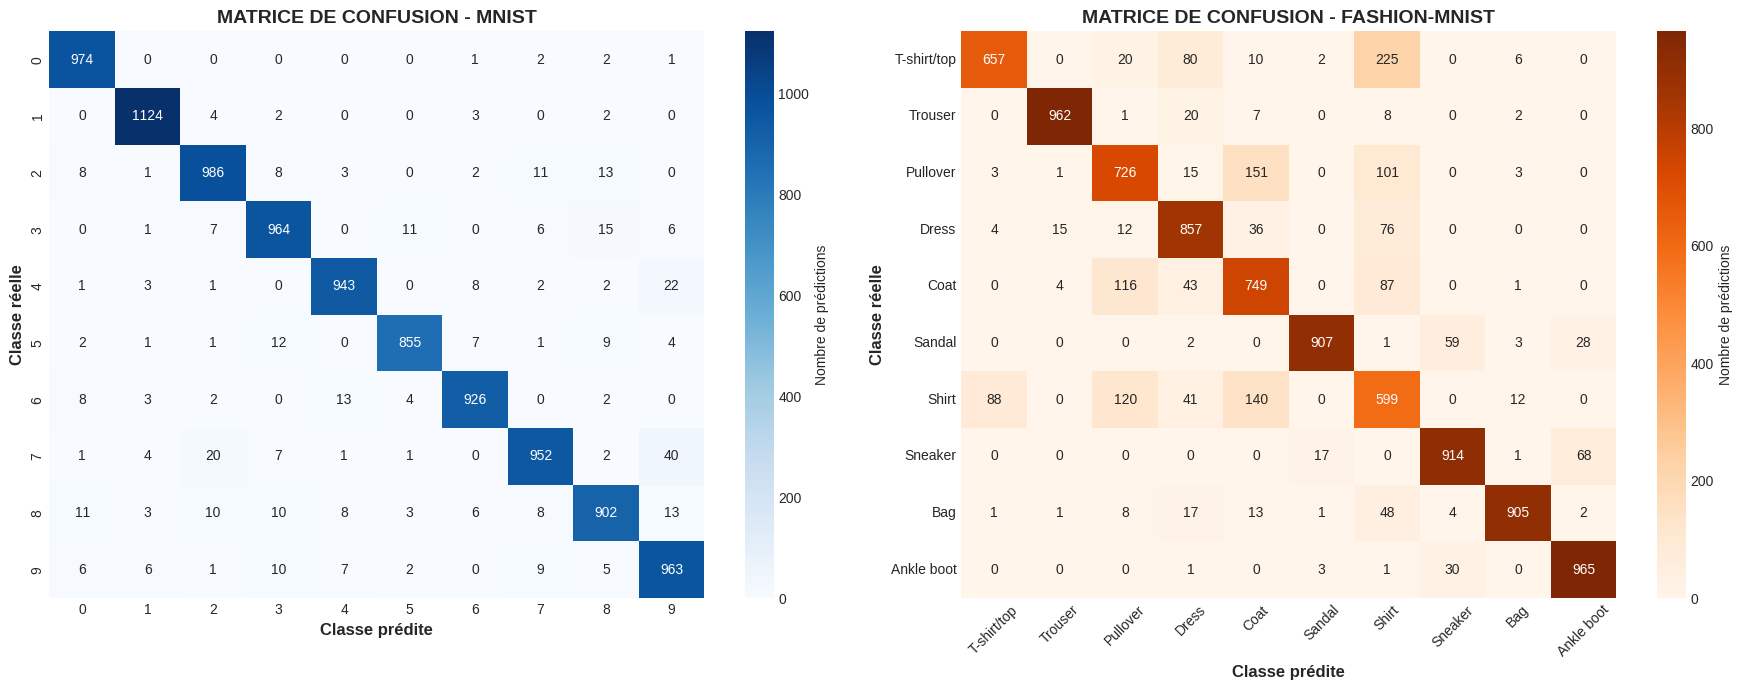

In [37]:
print("\n" + "="*70)
print("ÉTAPE 26: VISUALISATION DES FEATURE MAPS POUR UNE IMAGE")
print("="*70)

# Sélectionner une image test
test_img = X_test_m[0:1]
test_label = np.argmax(y_test_m[0])

# Construire explicitement le modèle pour définir les entrées/sorties des couches
model_viz.build((None, 28, 28, 1)) # Utilisez la forme de l'input_shape définie dans create_cnn_architecture

# Créer un modèle pour extraire les feature maps
# Utiliser l'entrée de la première couche du modèle original et la sortie des couches cibles
layer_outputs = [layer.output for layer in model_viz.layers[:4]]  # Conv1, Pool1, Conv2, Pool2
activation_model = keras.models.Model(inputs=model_viz.layers[0].input, outputs=layer_outputs)

# Obtenir les activations
activations = activation_model.predict(test_img, verbose=0)

layer_names = ['Conv2D_1', 'MaxPool_1', 'Conv2D_2', 'MaxPool_2']

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(5, 8, hspace=0.4, wspace=0.3)

# Image originale
ax_orig = fig.add_subplot(gs[0, :2])
ax_orig.imshow(test_img[0, :, :, 0], cmap='gray')
ax_orig.set_title(f'IMAGE ORIGINALE\nLabel: {test_label}', fontsize=14, fontweight='bold')
ax_orig.axis('off')

# Visualiser les feature maps de chaque couche
for layer_idx, (activation, name) in enumerate(zip(activations, layer_names)):
    n_features = activation.shape[-1]
    n_show = min(8, n_features)  # Afficher max 8 feature maps

    for i in range(n_show):
        row = layer_idx + 1
        col = i

        ax = fig.add_subplot(gs[row, col])
        ax.imshow(activation[0, :, :, i], cmap='viridis')
        ax.set_title(f'{name}\nMap {i}', fontsize=9)
        ax.axis('off')

# Ajouter des labels
ax_label1 = fig.add_subplot(gs[1, :])
ax_label1.text(0.5, 0.5, 'APRÈS CONV2D_1 (32 filtres 3×3)',
              ha='center', va='center', fontsize=12, fontweight='bold',
              transform=ax_label1.transAxes)
ax_label1.axis('off')

ax_label2 = fig.add_subplot(gs[2, :])
ax_label2.text(0.5, 0.5, 'APRÈS MAXPOOL_1 (Réduction de taille)',
              ha='center', va='center', fontsize=12, fontweight='bold',
              transform=ax_label2.transAxes)
ax_label2.axis('off')


ax_label3 = fig.add_subplot(gs[3, :])
ax_label3.text(0.5, 0.5, 'APRÈS CONV2D_2 (64 filtres 3×3)',
              ha='center', va='center', fontsize=12, fontweight='bold',
              transform=ax_label3.transAxes)
ax_label3.axis('off')

ax_label4 = fig.add_subplot(gs[4, :])
ax_label4.text(0.5, 0.5, 'APRÈS MAXPOOL_2 (Réduction finale)',
              ha='center', va='center', fontsize=12, fontweight='bold',
              transform=ax_label4.transAxes)
ax_label4.axis('off')


plt.suptitle('VISUALISATION DES FEATURE MAPS À TRAVERS LE RÉSEAU',
            fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# ==========================================
# 27. MATRICE DE CONFUSION
# ==========================================

print("\n" + "="*70)
print("ÉTAPE 27: MATRICES DE CONFUSION")
print("="*70)

from sklearn.metrics import confusion_matrix, classification_report

# Prédictions
y_pred_mnist = model_viz.predict(X_test_m, verbose=0)
y_pred_mnist_classes = np.argmax(y_pred_mnist, axis=1)
y_true_mnist = np.argmax(y_test_m, axis=1)

# Matrice de confusion
cm_mnist = confusion_matrix(y_true_mnist, y_pred_mnist_classes)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# MNIST
sns.heatmap(cm_mnist, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10),
            ax=axes[0], cbar_kws={'label': 'Nombre de prédictions'})
axes[0].set_title('MATRICE DE CONFUSION - MNIST', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Classe prédite', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Classe réelle', fontsize=12, fontweight='bold')

# Fashion-MNIST (entraîner rapidement)
model_viz_fashion = create_cnn_architecture(
    name='Viz_Fashion',
    filters_list=[32, 64],
    kernel_sizes=[(3, 3), (3, 3)],
    pool_after=[True, True],
    dense_units=[128],
    dropout_rate=0.3
)
model_viz_fashion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_viz_fashion.fit(X_train_f[:5000], y_train_f[:5000], epochs=5, batch_size=128, verbose=0)

y_pred_fashion = model_viz_fashion.predict(X_test_f, verbose=0)
y_pred_fashion_classes = np.argmax(y_pred_fashion, axis=1)
y_true_fashion = np.argmax(y_test_f, axis=1)

cm_fashion = confusion_matrix(y_true_fashion, y_pred_fashion_classes)

sns.heatmap(cm_fashion, annot=True, fmt='d', cmap='Oranges',
            xticklabels=fashion_labels, yticklabels=fashion_labels,
            ax=axes[1], cbar_kws={'label': 'Nombre de prédictions'})
axes[1].set_title('MATRICE DE CONFUSION - FASHION-MNIST', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Classe prédite', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Classe réelle', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


ÉTAPE 28: ANALYSE DES ERREURS DE CLASSIFICATION

Nombre d'erreurs sur MNIST: 411/10000
Taux d'erreur: 4.11%


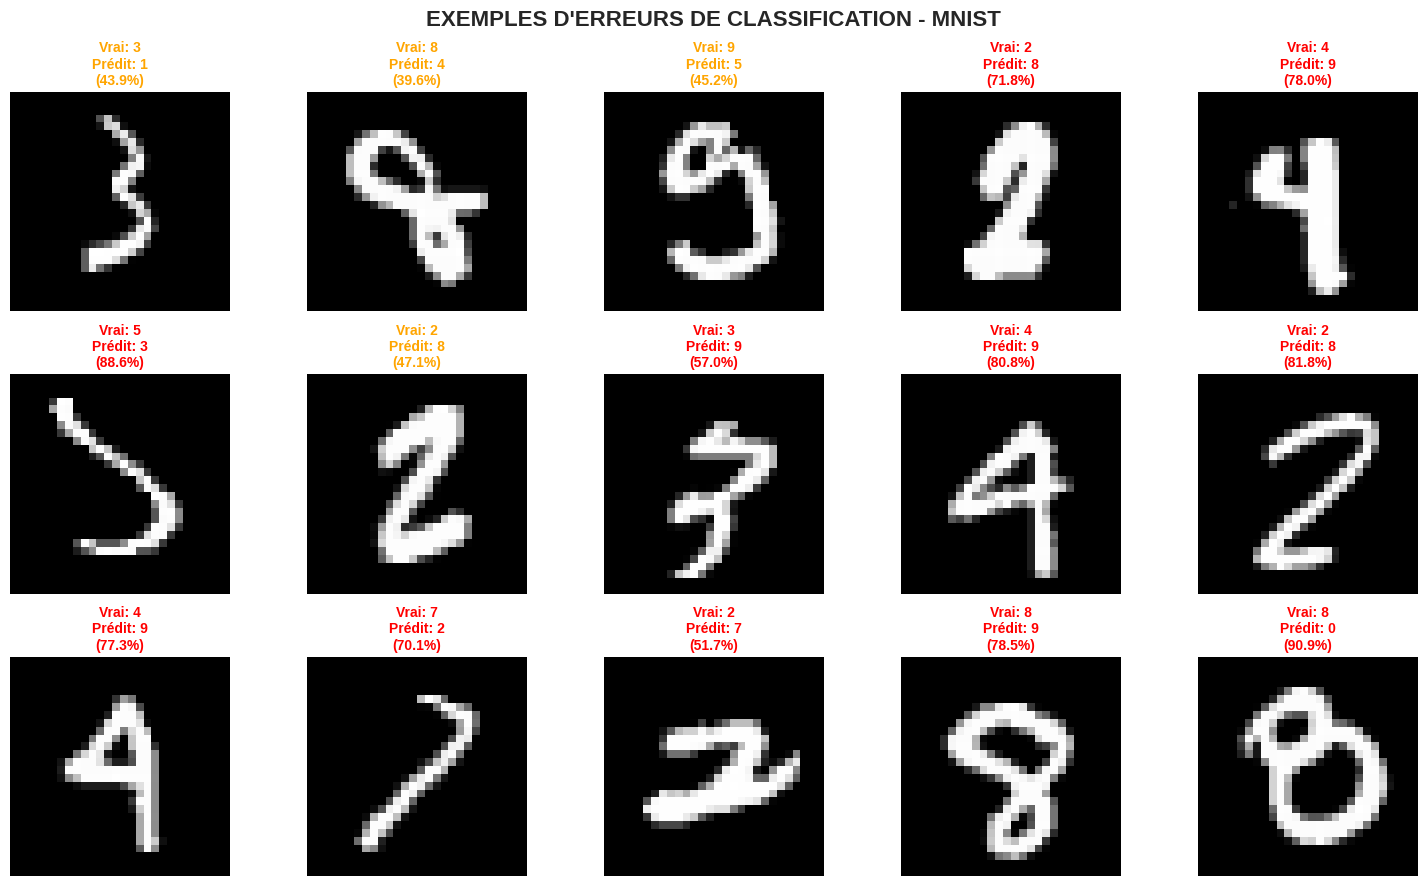

In [38]:
print("\n" + "="*70)
print("ÉTAPE 28: ANALYSE DES ERREURS DE CLASSIFICATION")
print("="*70)

# Trouver les erreurs
errors_idx = np.where(y_pred_mnist_classes != y_true_mnist)[0]

print(f"\nNombre d'erreurs sur MNIST: {len(errors_idx)}/{len(y_true_mnist)}")
print(f"Taux d'erreur: {len(errors_idx)/len(y_true_mnist)*100:.2f}%")

# Visualiser quelques erreurs
n_errors_show = 15
random_errors = np.random.choice(errors_idx, min(n_errors_show, len(errors_idx)), replace=False)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('EXEMPLES D\'ERREURS DE CLASSIFICATION - MNIST',
             fontsize=16, fontweight='bold')

for i, idx in enumerate(random_errors):
    ax = axes[i // 5, i % 5]

    ax.imshow(X_test_m[idx, :, :, 0], cmap='gray')

    true_label = y_true_mnist[idx]
    pred_label = y_pred_mnist_classes[idx]
    confidence = y_pred_mnist[idx, pred_label] * 100

    title = f'Vrai: {true_label}\nPrédit: {pred_label}\n({confidence:.1f}%)'
    color = 'red' if confidence > 50 else 'orange'

    ax.set_title(title, fontsize=10, fontweight='bold', color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()


ÉTAPE 29: PERFORMANCE PAR CLASSE

📊 PERFORMANCE PAR CLASSE - MNIST:
 Classe  Précision    Rappel  F1-Score  Support
      0  96.340257 99.387755 97.840281      980
      1  98.080279 99.030837 98.553266     1135
      2  95.542636 95.542636 95.542636     1032
      3  95.162883 95.445545 95.304004     1010
      4  96.717949 96.028513 96.371998      982
      5  97.602740 95.852018 96.719457      892
      6  97.166842 96.659708 96.912611      958
      7  96.064581 92.607004 94.304111     1028
      8  94.549266 92.607803 93.568465      974
      9  91.801716 95.441031 93.586006     1009


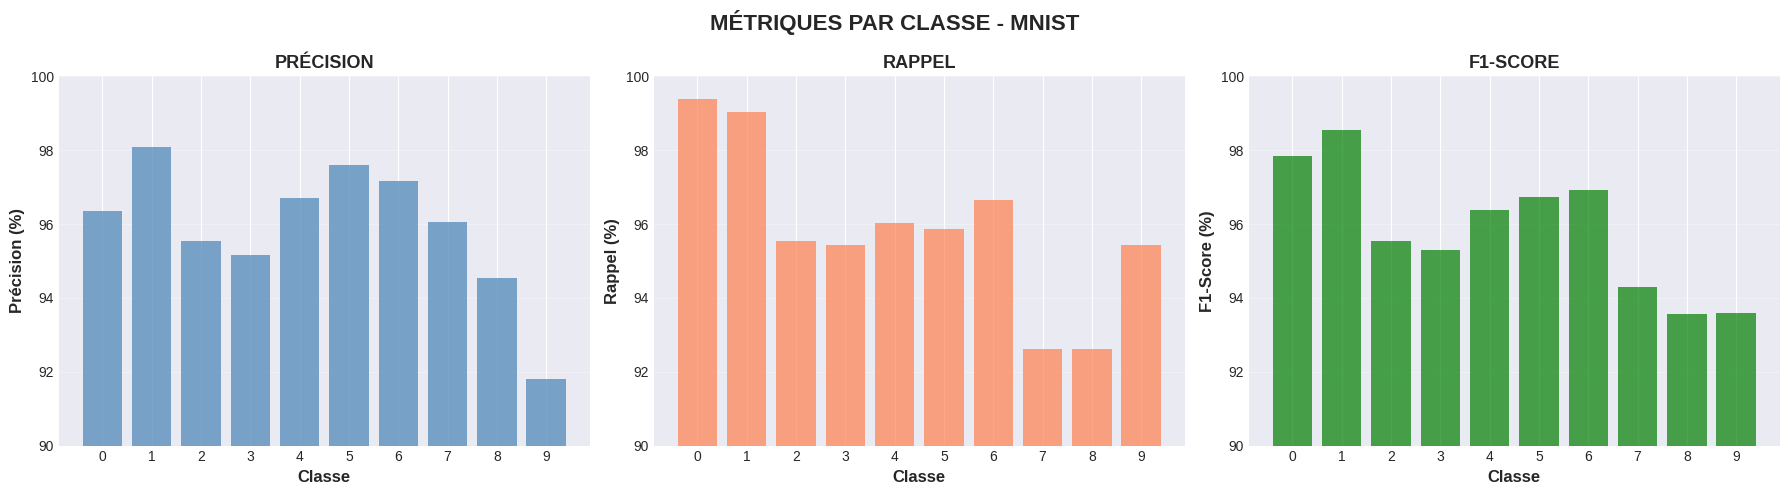

In [39]:
print("\n" + "="*70)
print("ÉTAPE 29: PERFORMANCE PAR CLASSE")
print("="*70)

# Calculer la précision par classe
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(
    y_true_mnist, y_pred_mnist_classes, average=None)

# Créer un DataFrame
class_performance = pd.DataFrame({
    'Classe': range(10),
    'Précision': precision * 100,
    'Rappel': recall * 100,
    'F1-Score': f1 * 100,
    'Support': support
})

print("\n📊 PERFORMANCE PAR CLASSE - MNIST:")
print("="*70)
print(class_performance.to_string(index=False))

# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('MÉTRIQUES PAR CLASSE - MNIST', fontsize=16, fontweight='bold')

# Précision
axes[0].bar(range(10), precision * 100, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Classe', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Précision (%)', fontsize=12, fontweight='bold')
axes[0].set_title('PRÉCISION', fontsize=13, fontweight='bold')
axes[0].set_xticks(range(10))
axes[0].grid(True, axis='y', alpha=0.3)
axes[0].set_ylim([90, 100])

# Rappel
axes[1].bar(range(10), recall * 100, color='coral', alpha=0.7)
axes[1].set_xlabel('Classe', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Rappel (%)', fontsize=12, fontweight='bold')
axes[1].set_title('RAPPEL', fontsize=13, fontweight='bold')
axes[1].set_xticks(range(10))
axes[1].grid(True, axis='y', alpha=0.3)
axes[1].set_ylim([90, 100])

# F1-Score
axes[2].bar(range(10), f1 * 100, color='green', alpha=0.7)
axes[2].set_xlabel('Classe', fontsize=12, fontweight='bold')
axes[2].set_ylabel('F1-Score (%)', fontsize=12, fontweight='bold')
axes[2].set_title('F1-SCORE', fontsize=13, fontweight='bold')
axes[2].set_xticks(range(10))
axes[2].grid(True, axis='y', alpha=0.3)
axes[2].set_ylim([90, 100])

plt.tight_layout()
plt.show()